In [182]:
import numpy as np
import pandas as pd
from numpy import random
from numpy.linalg import inv
import os
from scipy import stats
from collections import Counter
import scipy
from scipy.stats import skew, kurtosis
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import legend
from scipy.stats import *
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import proportion as ssp
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from statsmodels.stats import rates
from statsmodels.stats.rates import test_poisson
from statsmodels.stats.rates import test_poisson_2indep
from scipy.stats import ttest_ind

In [114]:
os.getcwd()
os.chdir(r'C:\\Users\\deven\\Statistics\\WD')

In [115]:
df = pd.read_csv('hotel_bookings.csv')

In [116]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [118]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [119]:
df = df.dropna(subset=['children'])

In [120]:
df['children'] = df['children'].astype(int)

In [121]:
df['children'].unique()

array([ 0,  1,  2, 10,  3])

In [ ]:
df = df(df.country.drop,axis = 1)

____________________

In [123]:
agent_na = np.median(df['agent'])
agent_na

np.float64(nan)

In [124]:
(df['agent']== 0).sum()

np.int64(0)

In [125]:
df['agent'] = df['agent'].fillna(0).astype(int)

____________

In [126]:
df.shape

(119386, 32)

In [127]:
df['company'].unique

<bound method Series.unique of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119385   NaN
119386   NaN
119387   NaN
119388   NaN
119389   NaN
Name: company, Length: 119386, dtype: float64>

In [128]:
df.drop(['company'], axis=1, inplace=True)

# Creating a new column for room mismatch

In [129]:
df['room_mismatch'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)
room_mismatch = df['room_mismatch']

_______________

# Normalize the Data

In [130]:
df1=pd.get_dummies(df, drop_first=True)

In [131]:
df1= pd.get_dummies(df, columns=[
    'hotel', 'meal', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type', 'deposit_type',
    'customer_type', 'reservation_status', 'arrival_date_month'
])

In [132]:
df1.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,0,342,2015,27,1,0,0,2,0,0,...,False,False,False,True,False,False,False,False,False,False
1,0,737,2015,27,1,0,0,2,0,0,...,False,False,False,True,False,False,False,False,False,False
2,0,7,2015,27,1,0,1,1,0,0,...,False,False,False,True,False,False,False,False,False,False
3,0,13,2015,27,1,0,1,1,0,0,...,False,False,False,True,False,False,False,False,False,False
4,0,14,2015,27,1,0,2,2,0,0,...,False,False,False,True,False,False,False,False,False,False


In [133]:
df1.shape

(119386, 85)

____________________

# Removing Duplicates

In [134]:
with_duplicates = df.shape[0]
df.drop_duplicates(inplace=True)
without_duplicates = df.shape[0]
print(f'Number of duplicate records dropped : {with_duplicates-without_duplicates}')

Number of duplicate records dropped : 32001


In [135]:
df.shape

(87385, 32)

____________

# Creating & Combining Columns

In [136]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d',errors='coerce' )

In [137]:
df = df.drop(columns=['arrival_date_year','arrival_date_month','arrival_date_day_of_month'])

In [138]:
df = df.drop(columns=['arrival_date_week_number'])

In [139]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

In [140]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [141]:
df = df.drop(columns=['stays_in_weekend_nights','stays_in_week_nights'])

In [142]:
df['total_guests'] = (df['adults'] + df['children'].fillna(0) + df['babies']).astype(int)

In [143]:
df['room_mismatch'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)
room_mismatch = df['room_mismatch']

In [144]:
df.shape

(87385, 29)

__________________

# Removing Outlier

In [145]:
num_df = df.select_dtypes(include=['number'])
num_df.head()

,is_canceled,lead_time,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,room_mismatch,total_nights,total_guests
0,0,342,2,0,0,0,0,0,3,0,0,0.0,0,0,0,0,2
1,0,737,2,0,0,0,0,0,4,0,0,0.0,0,0,0,0,2
2,0,7,1,0,0,0,0,0,0,0,0,75.0,0,0,1,1,1
3,0,13,1,0,0,0,0,0,0,304,0,75.0,0,0,0,1,1
4,0,14,2,0,0,0,0,0,0,240,0,98.0,0,1,0,2,2


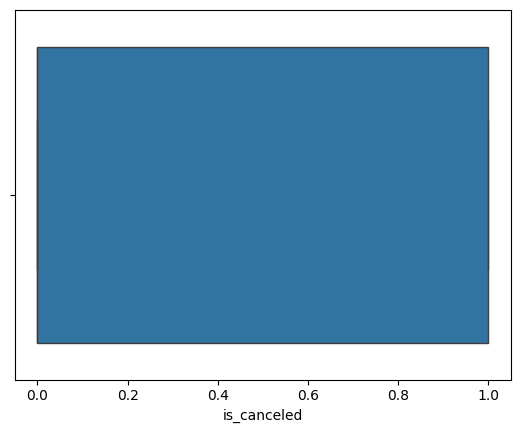

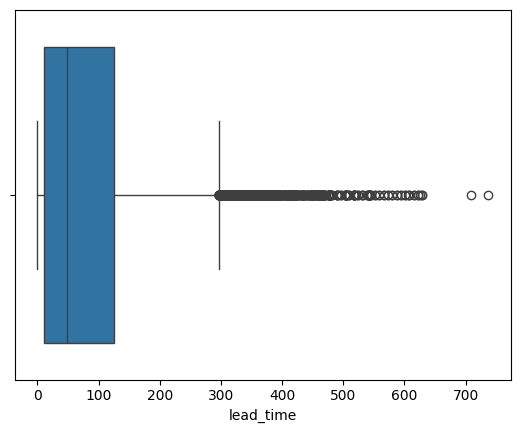

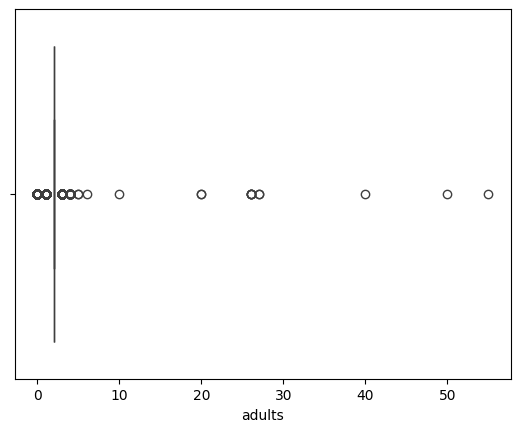

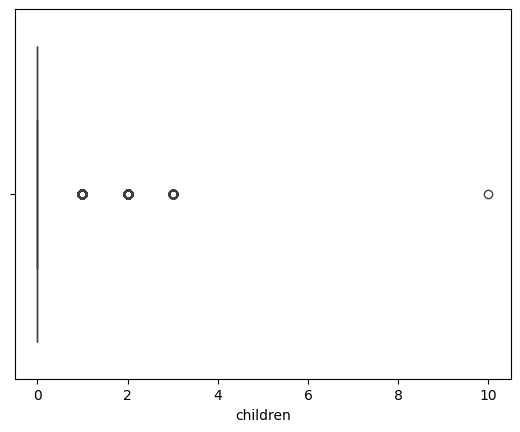

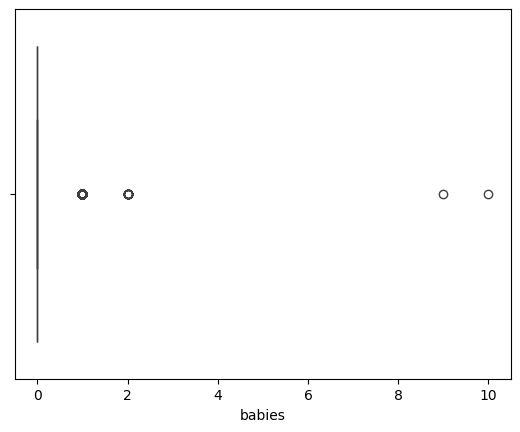

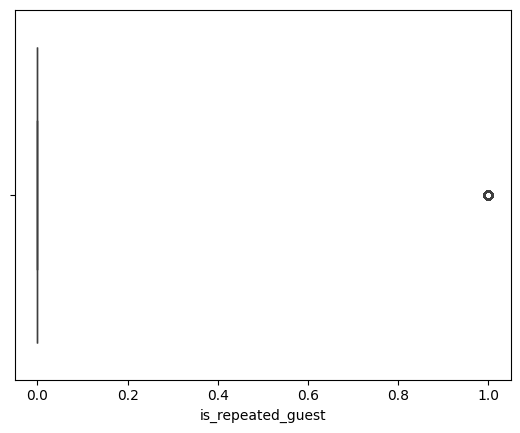

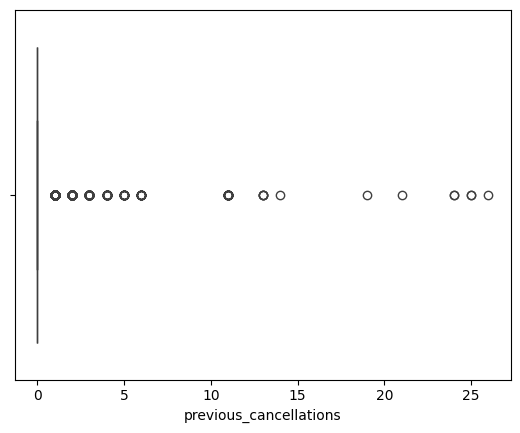

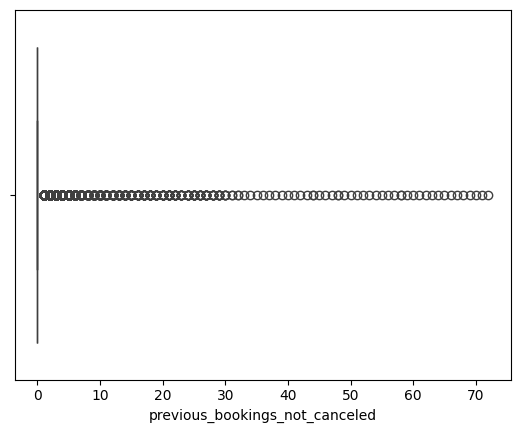

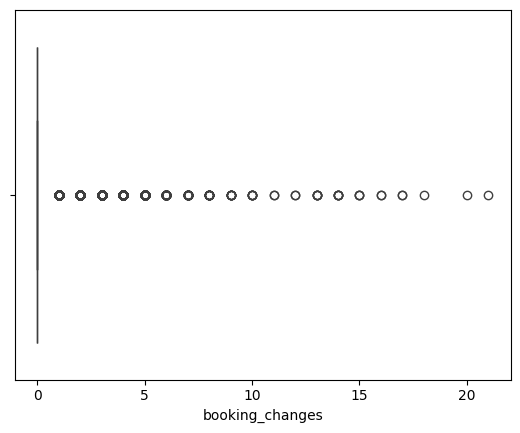

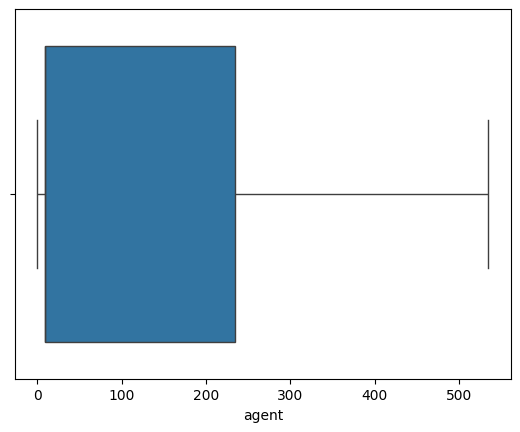

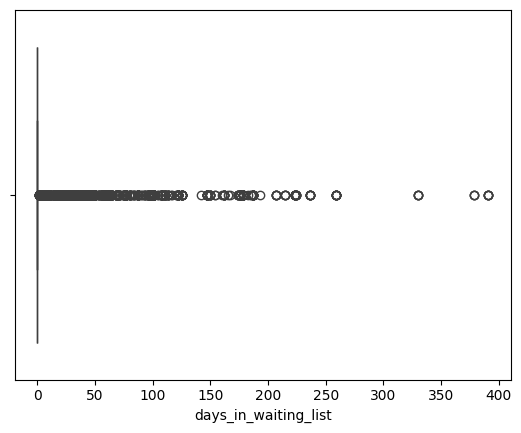

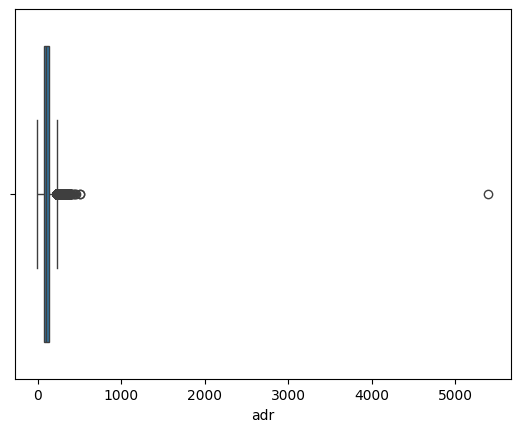

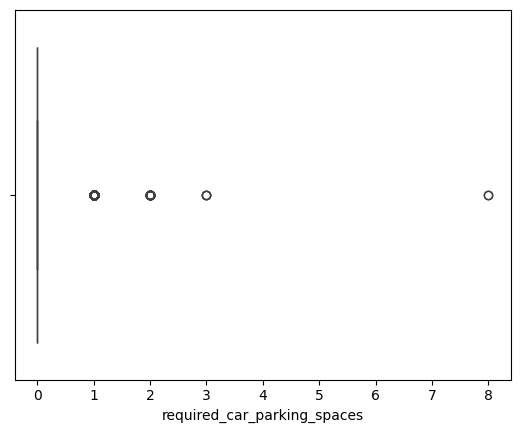

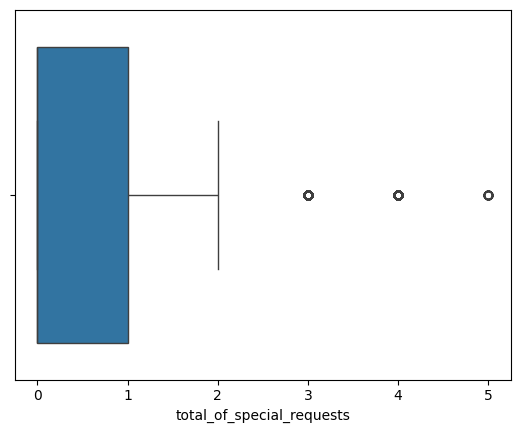

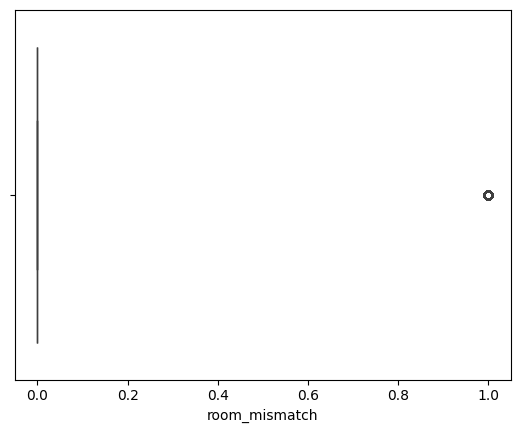

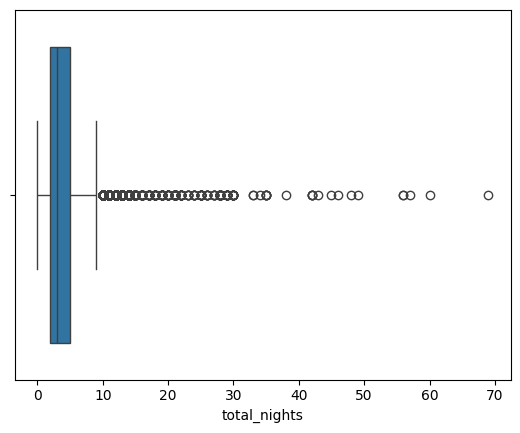

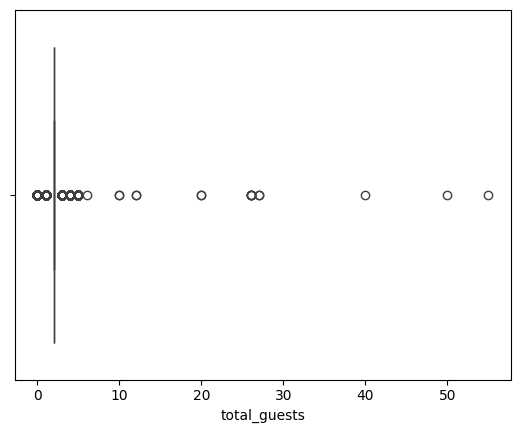

In [146]:
for ctr in num_df.select_dtypes(include='number').columns:
  sns.boxplot(data=num_df,x=ctr)
  plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x293c949ecd0>,
 'caps': [<matplotlib.lines.Line2D at 0x293c949cd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x293c949e450>],
 'medians': [<matplotlib.lines.Line2D at 0x293cb066bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x293cb067cd0>],
 'means': []}

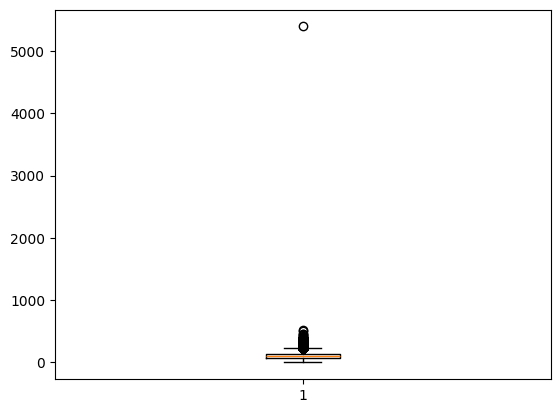

In [147]:
 plt.boxplot(df.adr)

In [148]:
q1 = np.percentile(df['adr'],25)
q3 = np.percentile(df['adr'],75)

In [149]:
iqr = q3 - q1
iqr

np.float64(62.0)

In [150]:
df = df[df['adr'] <= q3 + 1.5*iqr]
df.shape

(84895, 29)

In [151]:
df = df[df['adr'] >= q1 - 1.5*iqr]
df.shape

(84895, 29)

________________________

# **2. 📊 Exploratory Data Analysis**
Univariate and bivariate and multivariate analysis using relevant plots, Time-series analysis of booking trends. Guest demographics and distribution by country. Market segment share and ADR (Average Daily Rate) comparison. Booking lead time distribution across customer types


In [152]:
df['hotel'].value_counts()

hotel
City Hotel      52645
Resort Hotel    32250
Name: count, dtype: int64

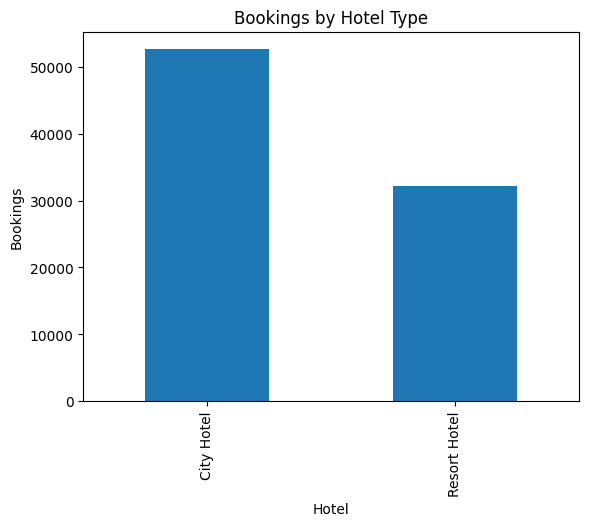

In [153]:
# Univariate Analysis
# Plot hotel type
df['hotel'].value_counts().plot(kind='bar')
plt.xlabel('Hotel')
plt.ylabel('Bookings')
plt.title('Bookings by Hotel Type')
plt.show()

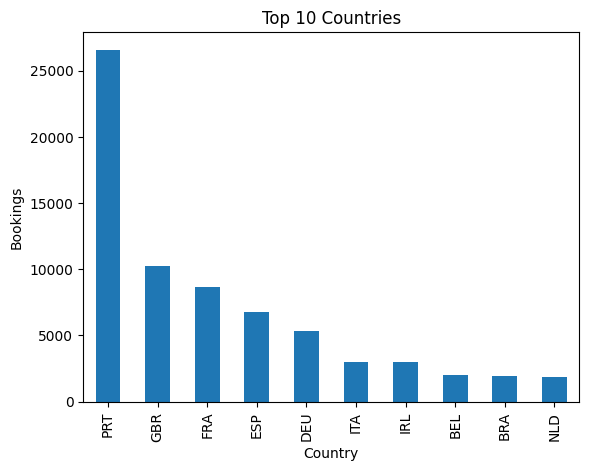

In [154]:
# Top 10 Countries
plt.figure()
df['country'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Bookings')
plt.title('Top 10 Countries')
plt.show()

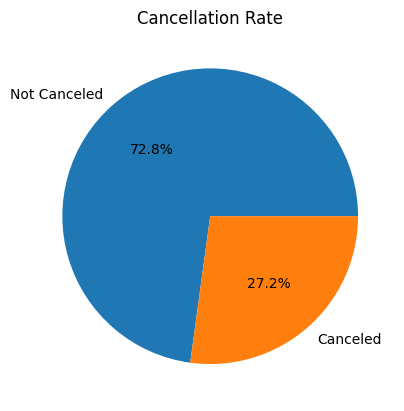

In [155]:
# Cancellations pie
plt.figure()
df['is_canceled'].replace({0:'Not Canceled',1:'Canceled'}).value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Cancellation Rate')
plt.ylabel('')
plt.show()

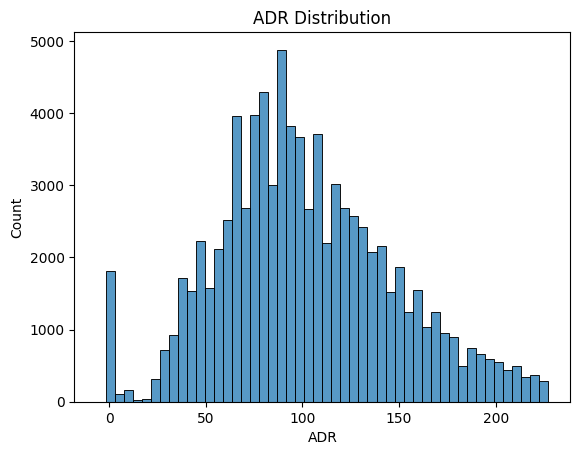

In [156]:
# ADR distribution
plt.figure()
sns.histplot(df[df['adr'] < 500]['adr'], bins=50)
plt.xlabel('ADR')
plt.title('ADR Distribution')
plt.show()

In [157]:
# Distribution OF customer type

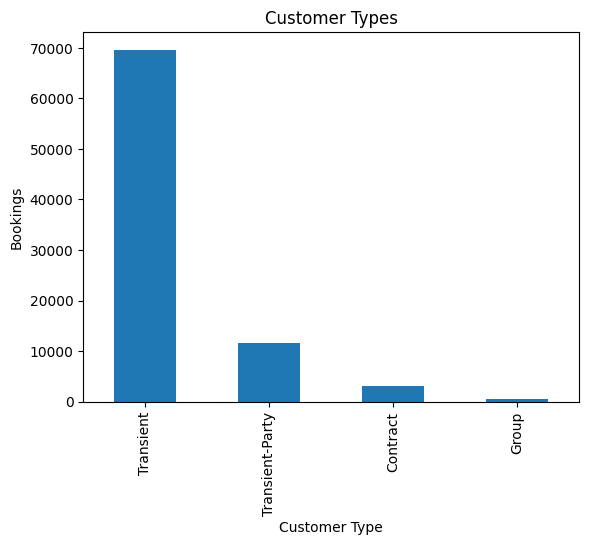

In [158]:
# Customer types
plt.figure()
df['customer_type'].value_counts().plot(kind='bar')
plt.xlabel('Customer Type')
plt.ylabel('Bookings')
plt.title('Customer Types')
plt.show()

In [160]:
#Distribution of lead time for booking

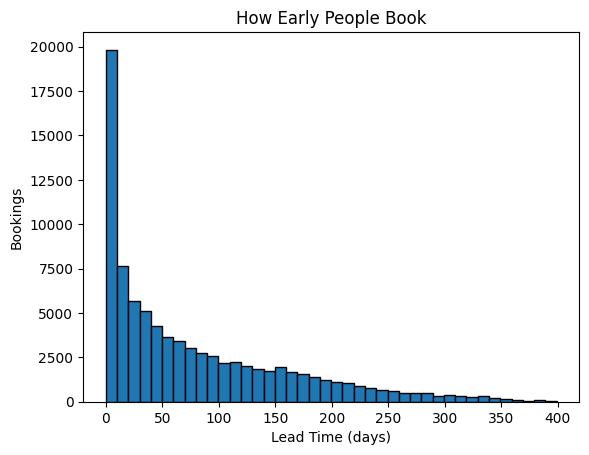

In [161]:
# Lead time
df[df['lead_time'] < 400]['lead_time'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlabel('Lead Time (days)')
plt.ylabel('Bookings')
plt.title('How Early People Book')
plt.show()

In [166]:
#ADR vs No. of special request

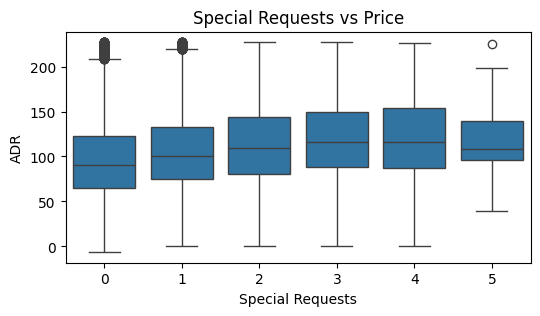

In [163]:
# Special Requests vs ADR
plt.figure(figsize=(6,3))
sns.boxplot(x='total_of_special_requests', y='adr', data=df[df['adr'] < 500])
plt.xlabel('Special Requests')
plt.ylabel('ADR')
plt.title('Special Requests vs Price')
plt.show()

# Histogram

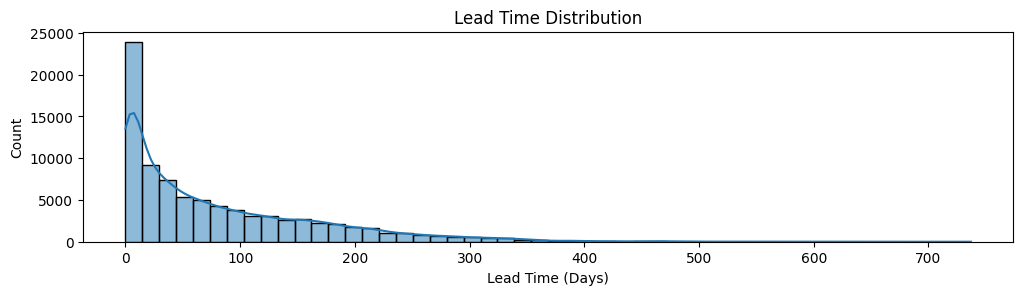

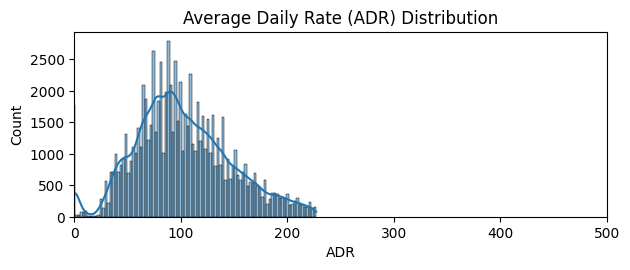

In [164]:
plt.figure(figsize = (12,6))

## 1. Lead Time Distribution

plt.subplot(2,1,1)
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (Days)')
plt.show()

## 2. ADR Distribution

plt.subplot(2,1,2)
sns.histplot(df['adr'], bins=100, kde=True)
plt.title('Average Daily Rate (ADR) Distribution')
plt.xlabel('ADR')
plt.xlim(0, 500)

plt.tight_layout()
plt.show()

# Bivariant

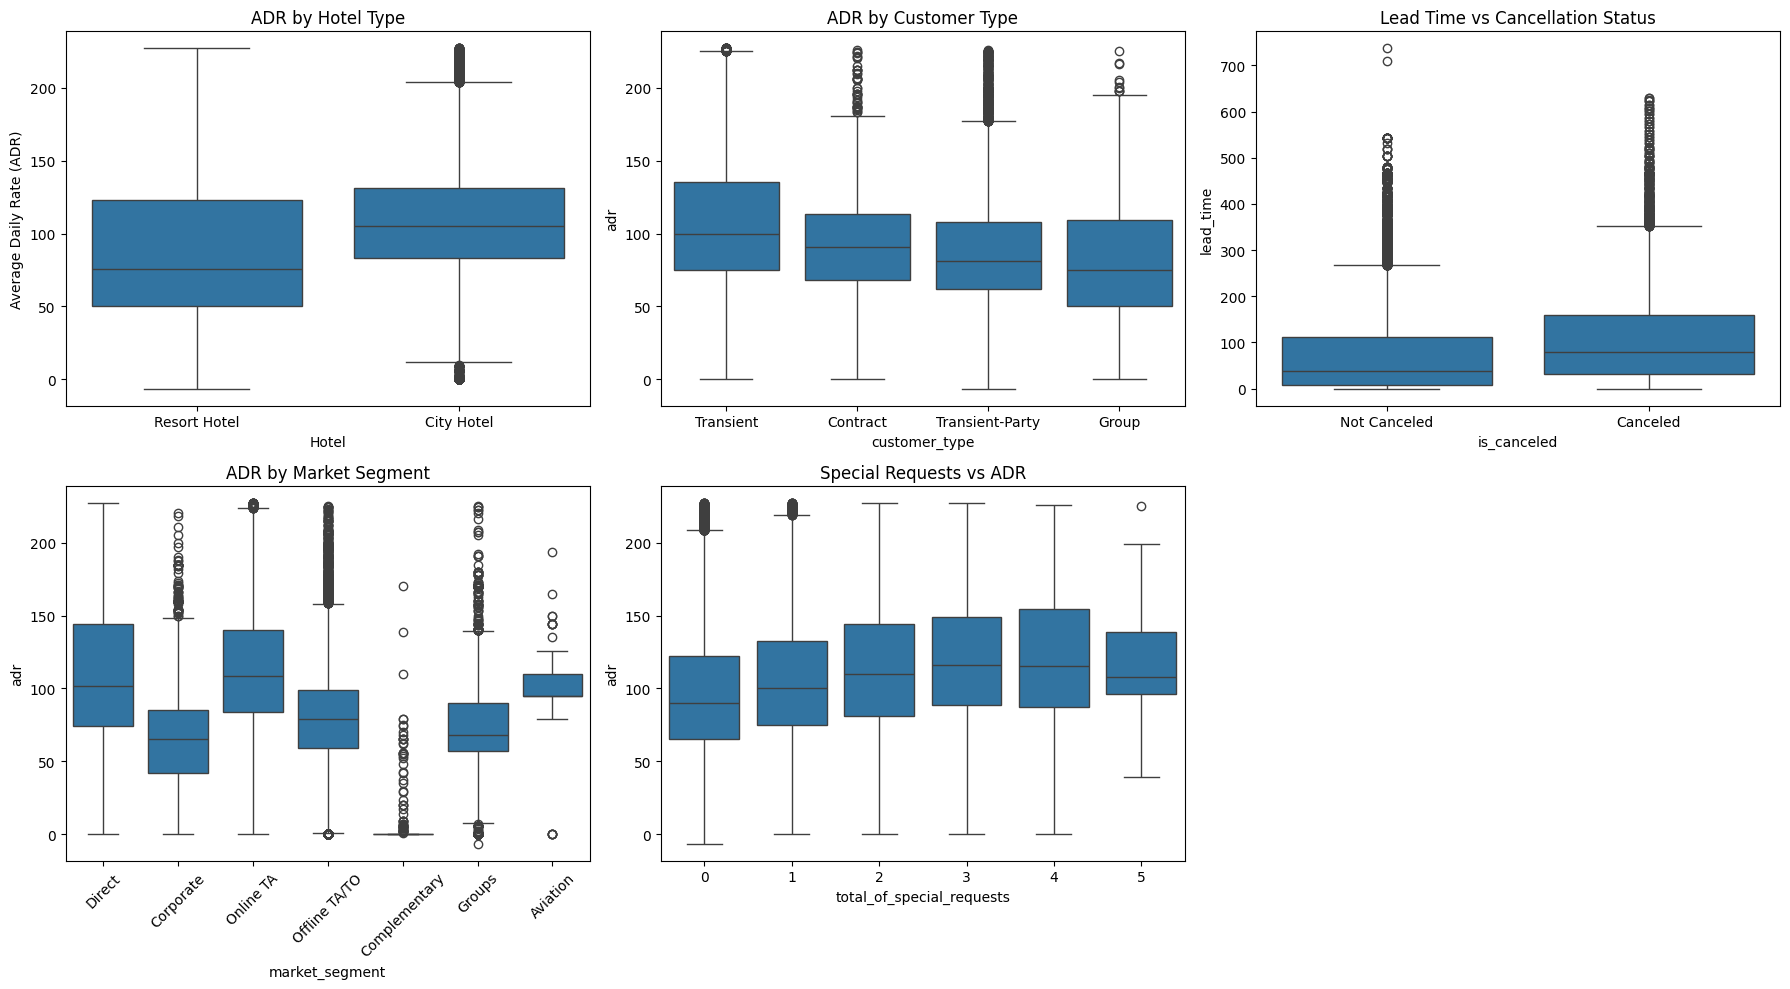

In [165]:
## BOXPLOTS

plt.figure(figsize = (18,10))

## 1. ADR by Hotel Type

plt.subplot(2,3,1)
sns.boxplot(x = df['hotel'], y = df['adr'])
plt.title('ADR by Hotel Type')
plt.xlabel('Hotel')
plt.ylabel('Average Daily Rate (ADR)')

## 2. ADR by Customer Type

plt.subplot(2,3,2)
sns.boxplot(x = df['customer_type'], y = df['adr'])
plt.title('ADR by Customer Type')

## 3. Lead Time vs Cancellation Status

plt.subplot(2,3,3)
sns.boxplot(x = df['is_canceled'], y = df['lead_time'])
plt.title('Lead Time vs Cancellation Status')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

## 4. ADR by Market Segment

plt.subplot(2,3,4)
sns.boxplot(data=df, x='market_segment', y='adr')
plt.title('ADR by Market Segment')
plt.xticks(rotation=45)

## 5. ADR vs Special Requests

plt.subplot(2,3,5)
sns.boxplot(data=df, x='total_of_special_requests', y='adr')
plt.title('Special Requests vs ADR')


plt.tight_layout()
plt.show()


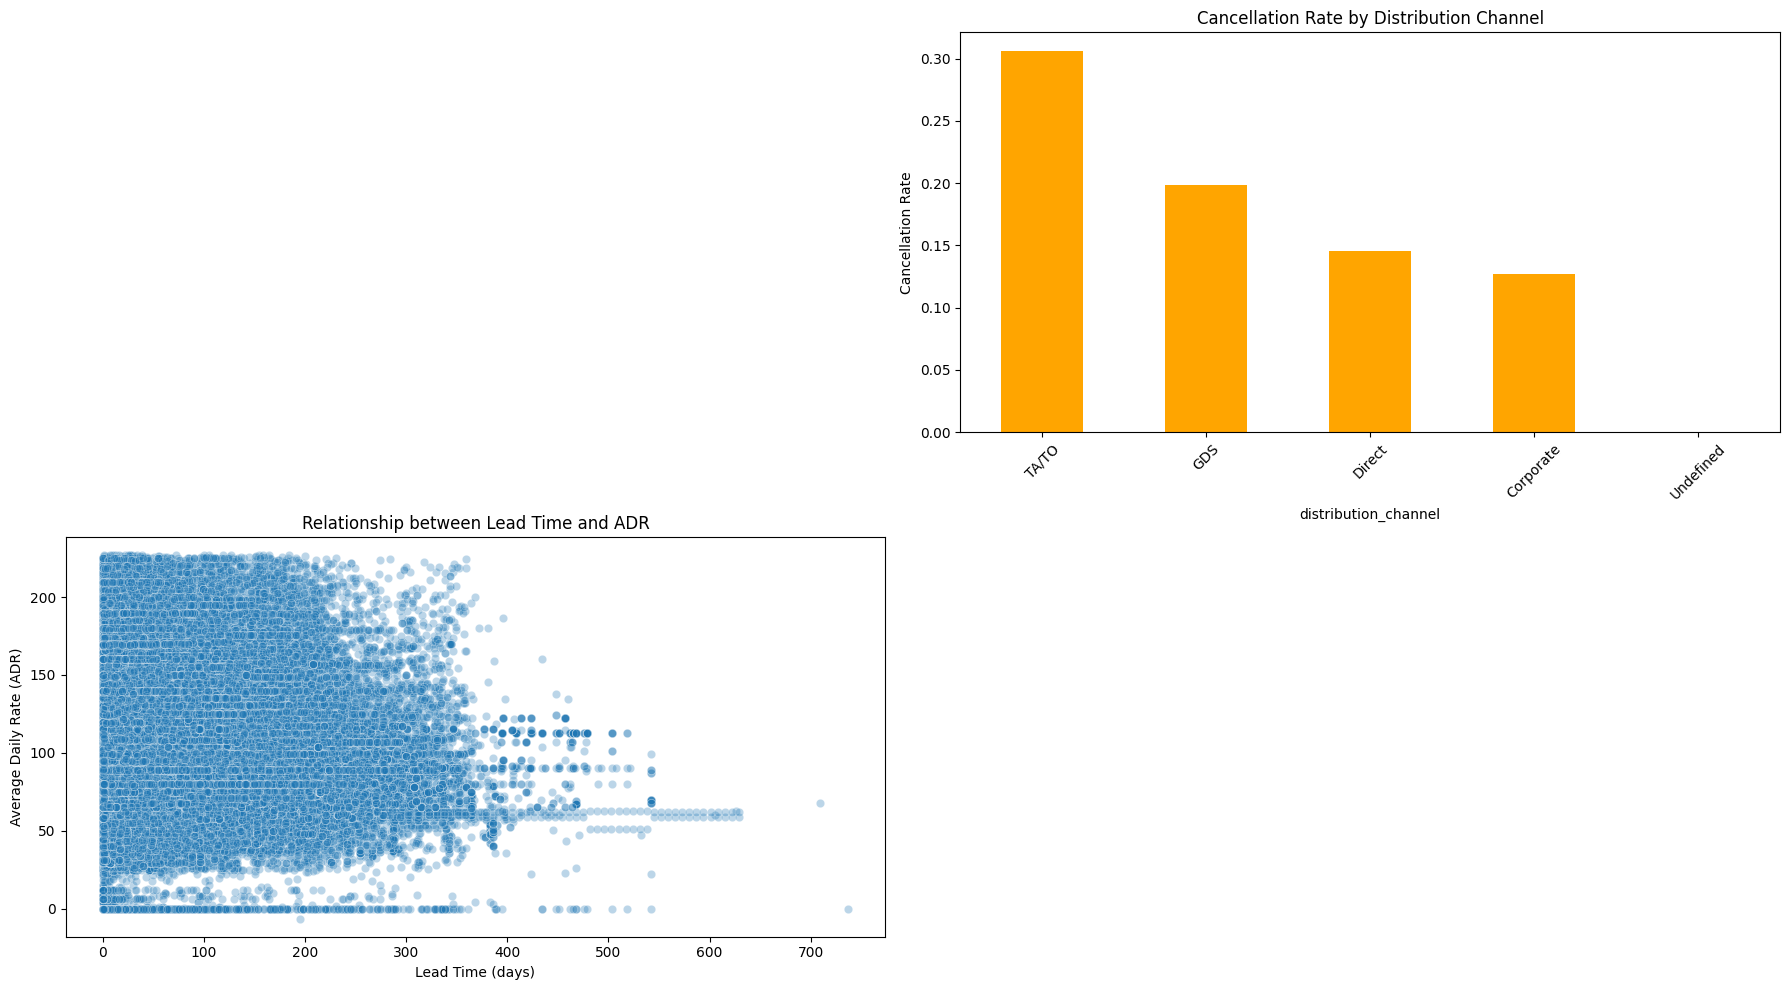

In [167]:
plt.figure(figsize = (18,10))

## 1. Cancellation Rate by Distribution Channel

cancel_rate = df.groupby('distribution_channel')['is_canceled'].mean().sort_values(ascending=False)
plt.subplot(2,2,2)
cancel_rate.plot(kind='bar', color='orange')
plt.title('Cancellation Rate by Distribution Channel')
plt.xticks(rotation=45)
plt.ylabel('Cancellation Rate')

## 2. Lead Time vs ADR

plt.subplot(2,2,3)
sns.scatterplot(data=df, x='lead_time', y='adr', alpha=0.3)
plt.title('Relationship between Lead Time and ADR')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (ADR)')

plt.tight_layout()
plt.show()

# Multivariant

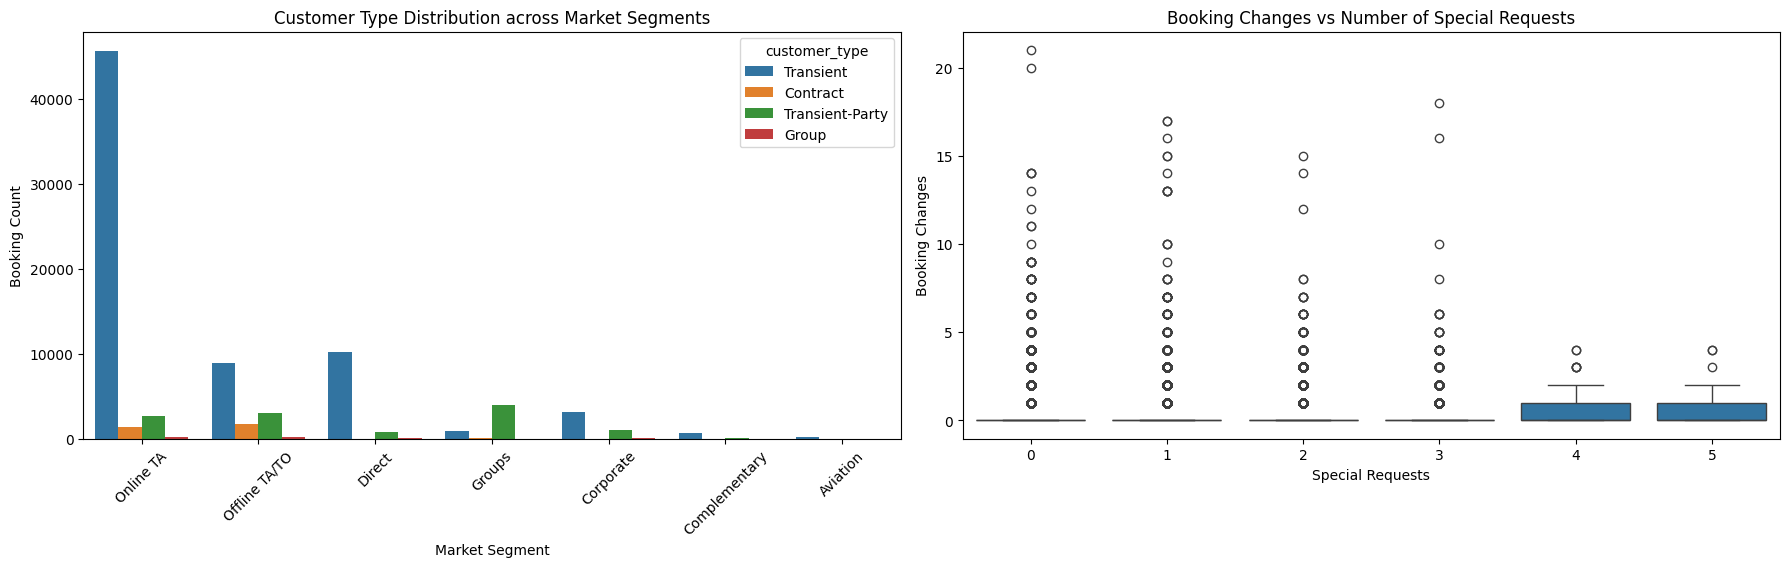

In [168]:
plt.figure(figsize = (18,10))

## 1. Customer Type per Market Segment

plt.subplot(2,2,1)
sns.countplot(data=df, x='market_segment', hue='customer_type', order=df['market_segment'].value_counts().index)
plt.title('Customer Type Distribution across Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Booking Count')
plt.xticks(rotation=45)


## 2. Booking Changes vs Total no. of special requests

plt.subplot(2,2,2)
sns.boxplot(data=df, x='total_of_special_requests', y='booking_changes')
plt.title('Booking Changes vs Number of Special Requests')
plt.xlabel('Special Requests')
plt.ylabel('Booking Changes')

plt.tight_layout()
plt.show()

In [169]:
df.head()

,hotel,is_canceled,lead_time,adults,children,babies,meal,country,market_segment,distribution_channel,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,room_mismatch,arrival_date,total_nights,total_guests
0,Resort Hotel,0,342,2,0,0,BB,PRT,Direct,Direct,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,2015-07-01,0,2
1,Resort Hotel,0,737,2,0,0,BB,PRT,Direct,Direct,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,2015-07-01,0,2
2,Resort Hotel,0,7,1,0,0,BB,GBR,Direct,Direct,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,2015-07-01,1,1
3,Resort Hotel,0,13,1,0,0,BB,GBR,Corporate,Corporate,...,Transient,75.0,0,0,Check-Out,2015-07-02,0,2015-07-01,1,1
4,Resort Hotel,0,14,2,0,0,BB,GBR,Online TA,TA/TO,...,Transient,98.0,0,1,Check-Out,2015-07-03,0,2015-07-01,2,2


# Time Series ANALYSIS

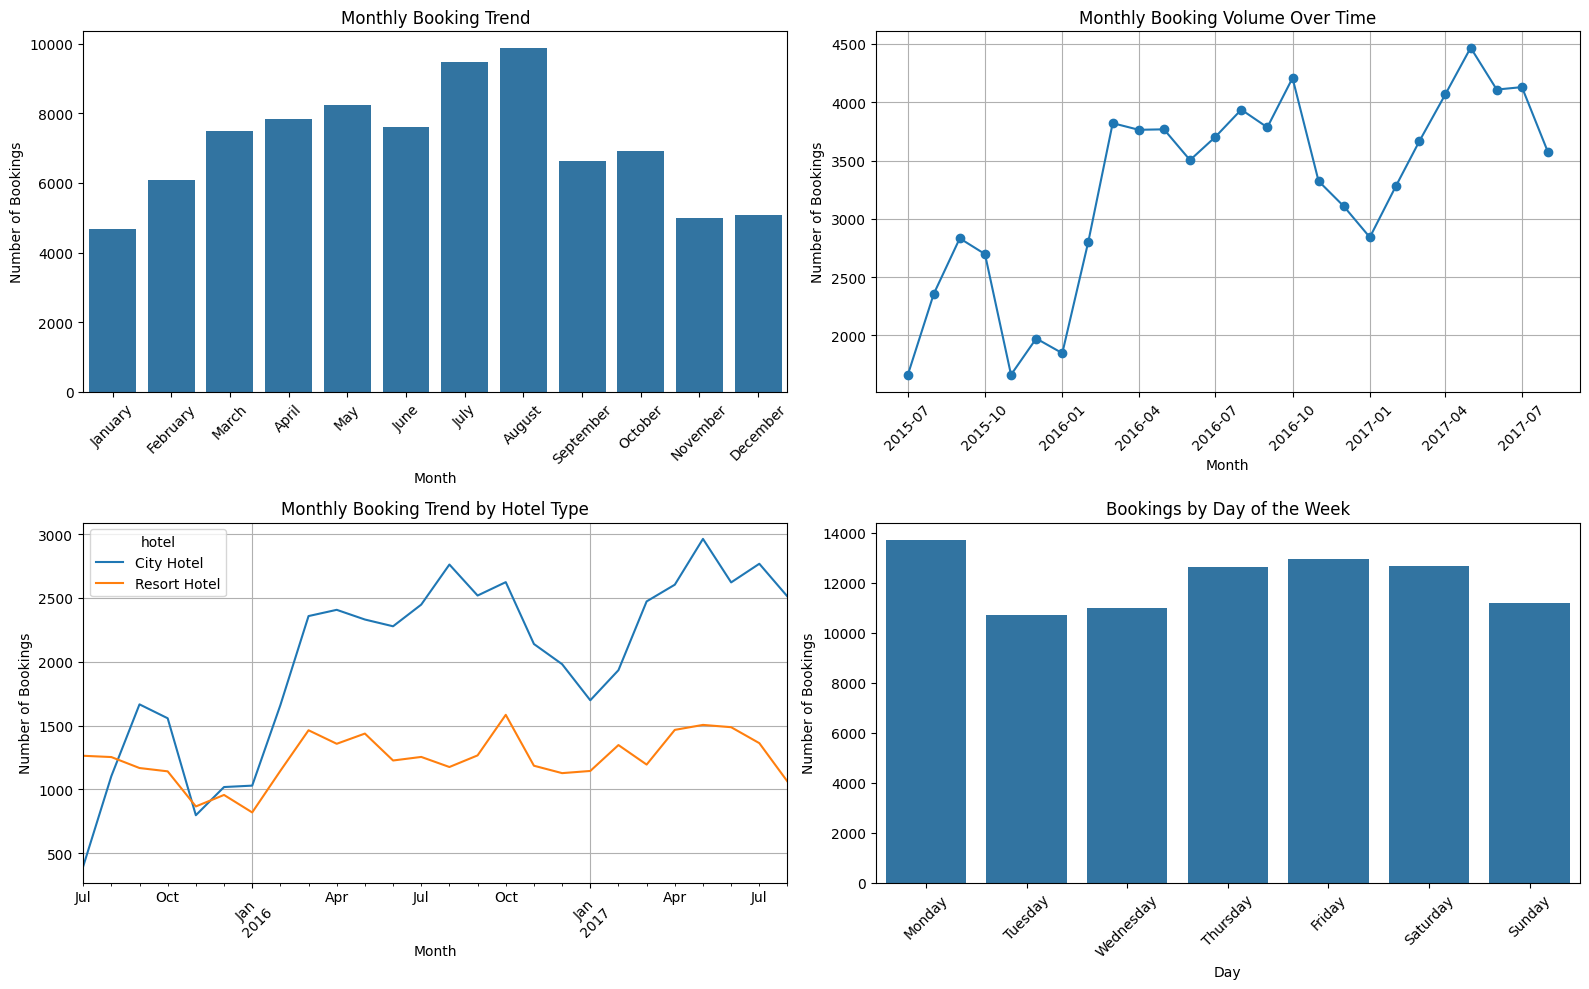

In [170]:
plt.figure(figsize=(16,10))  # Increase figure size for 2x2 layout

## 1. Monthly Booking Trend
df['arrival_month'] = df['arrival_date'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.subplot(2,2,1)
sns.countplot(data=df, x='arrival_month', order=month_order)
plt.title('Monthly Booking Trend')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)

## 2. Monthly Booking Volume (Time Series)
monthly_bookings = df.groupby(df['arrival_date'].dt.to_period('M')).size()
monthly_bookings.index = monthly_bookings.index.to_timestamp()

plt.subplot(2,2,2)
plt.plot(monthly_bookings.index, monthly_bookings.values, marker='o', linestyle='-')
plt.title('Monthly Booking Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(True)

## 3. Monthly Booking Trend by Hotel
df['month'] = df['arrival_date'].dt.to_period('M')
monthly_trend_hotel = df.groupby(['month', 'hotel']).size().unstack()
monthly_trend_hotel.index = monthly_trend_hotel.index.to_timestamp()

ax3 = plt.subplot(2,2,3)
monthly_trend_hotel.plot(ax=ax3)
plt.title('Monthly Booking Trend by Hotel Type')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.xticks(rotation=45)

## 4. Bookings by Day of the Week
df['dayofweek'] = df['arrival_date'].dt.day_name()

plt.subplot(2,2,4)
sns.countplot(data=df, x='dayofweek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Bookings by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# CORRELATION ANALYSIS

In [171]:
## Numerical Columns

numerical_df = df.select_dtypes(include='number')
numerical_df.columns

Index(['is_canceled', 'lead_time', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'room_mismatch', 'total_nights',
       'total_guests'],
      dtype='object')

In [172]:
## Pearson Correlation Matrix

correlation_matrix = numerical_df.corr(method='pearson')
correlation_matrix

,is_canceled,lead_time,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,room_mismatch,total_nights,total_guests
is_canceled,1.000000,0.185041,0.081756,0.057650,-0.019450,-0.089318,0.052602,-0.052138,-0.092016,-0.009238,0.005329,0.133913,-0.179985,-0.115454,-0.214195,0.080431,0.095217
lead_time,0.185041,1.000000,0.144628,0.029343,-0.002730,-0.148980,0.005122,-0.080035,0.077515,0.079877,0.133266,0.040021,-0.087691,0.036210,-0.108068,0.317843,0.133712
adults,0.081756,0.144628,1.000000,0.011405,0.016804,-0.172782,-0.041438,-0.121058,-0.052050,0.023320,-0.014932,0.258629,0.002377,0.113507,-0.071311,0.104457,0.825996
children,0.057650,0.029343,0.011405,1.000000,0.018253,-0.042636,-0.017671,-0.027406,0.032246,0.025122,-0.018808,0.264012,0.029479,0.052163,-0.021829,0.029819,0.553799
babies,-0.019450,-0.002730,0.016804,0.018253,1.000000,-0.012544,-0.005253,-0.009069,0.078491,0.028037,-0.006764,0.019025,0.029079,0.093123,0.015213,0.017472,0.169768
is_repeated_guest,-0.089318,-0.148980,-0.172782,-0.042636,-0.012544,1.000000,0.207137,0.442711,0.005008,-0.063326,-0.013119,-0.178104,0.073453,-0.002607,0.086939,-0.126220,-0.166159
previous_cancellations,0.052602,0.005122,-0.041438,-0.017671,-0.005253,0.207137,1.000000,0.392154,-0.010077,-0.032100,0.003557,-0.054605,-0.002741,0.002396,-0.010386,-0.021602,-0.044212
previous_bookings_not_canceled,-0.052138,-0.080035,-0.121058,-0.027406,-0.009069,0.442711,0.392154,1.000000,0.005712,-0.057416,-0.006487,-0.096388,0.042153,0.027671,0.040470,-0.064993,-0.115122
booking_changes,-0.092016,0.077515,-0.052050,0.032246,0.078491,0.005008,-0.010077,0.005712,1.000000,0.019313,0.025101,-0.013458,0.044493,0.011638,0.077207,0.082326,-0.013602
agent,-0.009238,0.079877,0.023320,0.025122,0.028037,-0.063326,-0.032100,-0.057416,0.019313,1.000000,-0.013878,-0.059770,0.118836,0.027697,0.035046,0.195620,0.036770


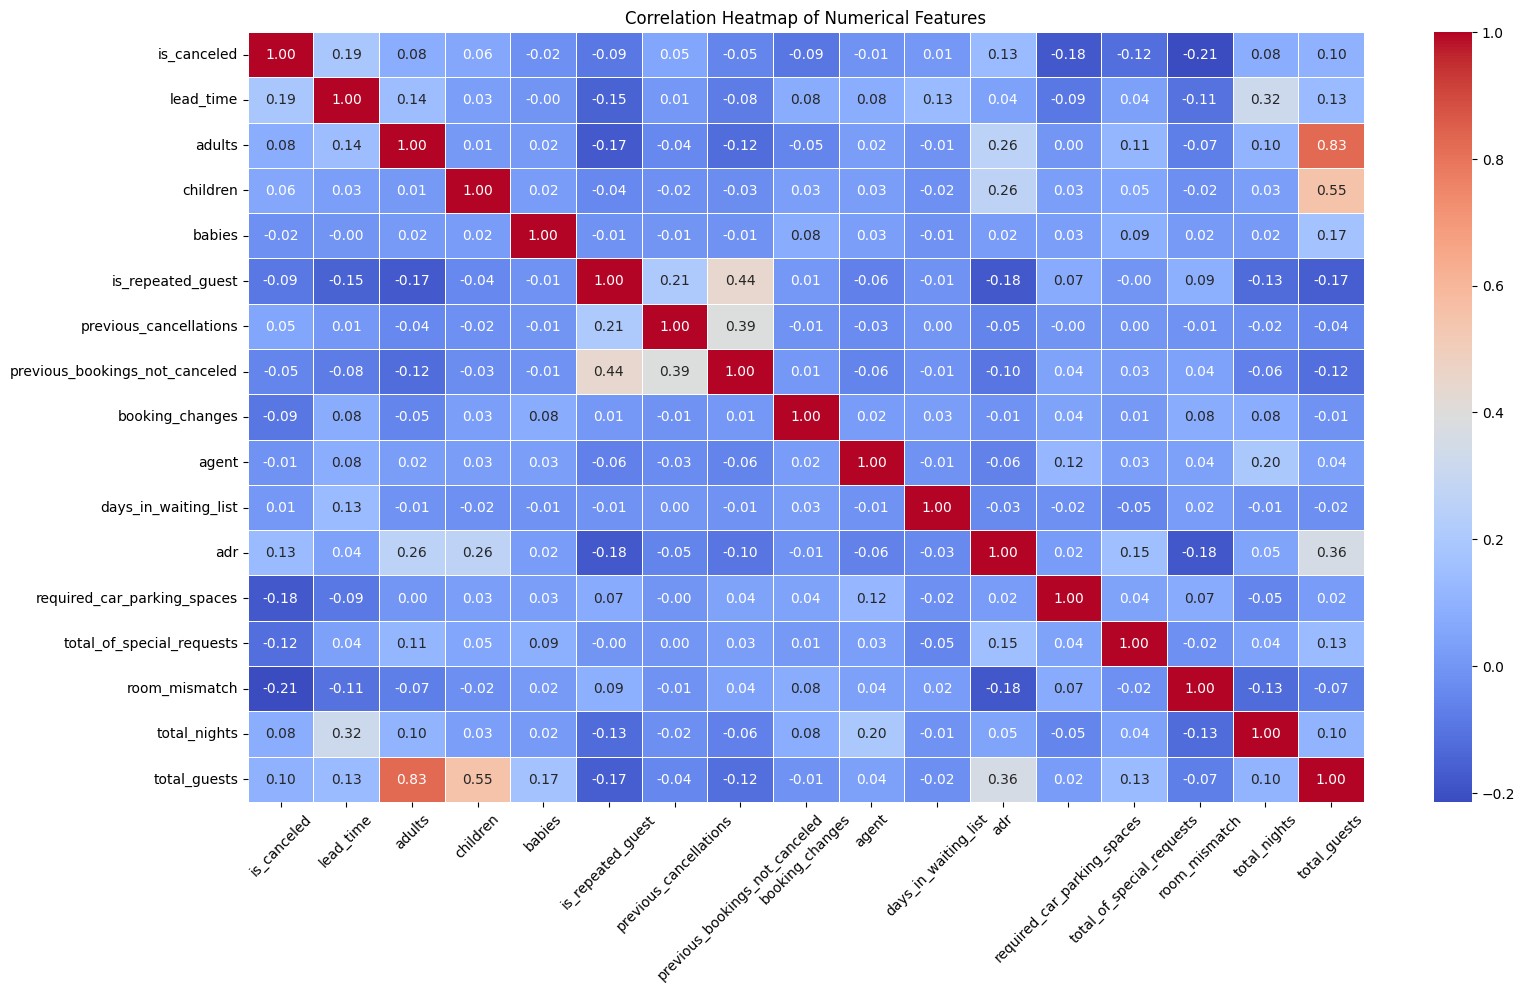

In [173]:
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.xticks(rotation=45)
plt.show()


In [174]:
## Correlation of ADR with numeric columns

adr_corr = correlation_matrix['adr'].sort_values(ascending=False)

print("Correlation of 'adr' with other features:")
print(adr_corr)


Correlation of 'adr' with other features:
adr                               1.000000
total_guests                      0.357217
children                          0.264012
adults                            0.258629
total_of_special_requests         0.152815
is_canceled                       0.133913
total_nights                      0.047570
lead_time                         0.040021
required_car_parking_spaces       0.019263
babies                            0.019025
booking_changes                  -0.013458
days_in_waiting_list             -0.034820
previous_cancellations           -0.054605
agent                            -0.059770
previous_bookings_not_canceled   -0.096388
is_repeated_guest                -0.178104
room_mismatch                    -0.183058
Name: adr, dtype: float64


_________________

# Hypothesis Testing

In [175]:
## 1.

## H0: There is no difference in ADR between bookings made through Online TA and Direct channels.
## i.e. avg(ADR from Online TA) = avg(ADR from Direct)

online_ta = df[df['distribution_channel'] == 'Online TA']['adr']
direct = df[df['distribution_channel'] == 'Direct']['adr']

In [176]:
z_score, p_value = ssw.ztest(online_ta, direct, alternative = 'two-sided')  ## p-value < 0.05, so we reject H0.

if p_value < 0.05:
    print('We reject the Null Hypothesis.')
else:
    print('We do not reject the Null Hypothesis.')

C:\Users\deven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\weightstats.py:1544: RuntimeWarning: Mean of empty slice.
  x1_mean = x1.mean(0)
C:\Users\deven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\deven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\weightstats.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice
  x1_var = x1.var(0)
C:\Users\deven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\_methods.py:181: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(ar

ZeroDivisionError: float division by zero

In [ ]:
## 2. 

## H0: Room upgrades are independent of lead time

upgraded = df[df['room_mismatch'] == 1]['lead_time']
not_upgraded = df[df['room_mismatch'] == 0]['lead_time']

t_score, p_value = ttest_ind(upgraded, not_upgraded, equal_var=False)  

if p_value < 0.05:
    print('We reject the Null Hypothesis.')
else:
    print('We do not reject the Null Hypothesis.')

In [ ]:
## 3. 

## H0: Average stay duration does not differ between customer types
## i.e. avg(stay_duration of Transient) == avg(stay_duration of Contract) == avg(stay_duration of Transient-Party) == avg(stay_duration of Group) 



# Transient
df_T = df[df['customer_type'] == 'Transient'][['total_nights']].copy()
df_T['customer_type'] = 'Transient'

# Contract
df_C = df[df['customer_type'] == 'Contract'][['total_nights']].copy()
df_C['customer_type'] = 'Contract'

# Transient-Party
df_TP = df[df['customer_type'] == 'Transient-Party'][['total_nights']].copy()
df_TP['customer_type'] = 'Transient-Party'

# Group
df_G = df[df['customer_type'] == 'Group'][['total_nights']].copy()
df_G['customer_type'] = 'Group'

df_total = pd.concat([df_T, df_C,df_TP, df_G])

## One Way ANOVA Test

mod1 = ols('total_nights ~ customer_type',data=df_total).fit()
tbl = sm.stats.anova_lm(mod1)
print(tbl)

In [ ]:
print(pairwise_tukeyhsd(endog=df_total['total_nights'],groups=df_total['customer_type']))

**p-value < 0.05, so we reject the Null Hypothesis.**

____________________

### Key Buisness Questions

1. What influence ADR the most?

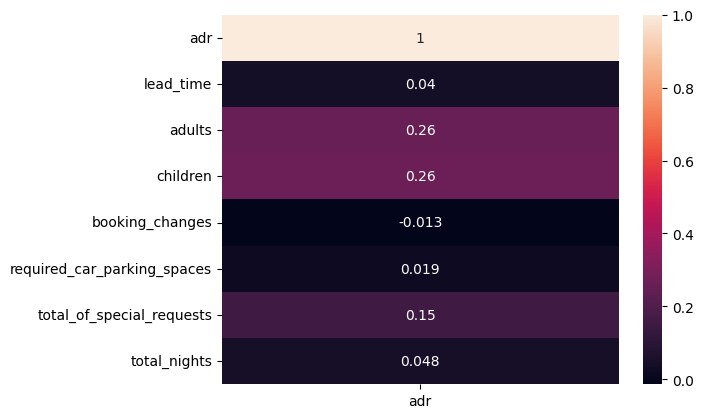

In [178]:
## Correlation of ADR with numeric columns

num_cols = ['adr', 'lead_time', 'adults', 'children', 'booking_changes',
            'required_car_parking_spaces', 'total_of_special_requests',
            'total_nights']

corr = df[num_cols].corr()

sns.heatmap(corr[['adr']], annot=True)
plt.show()

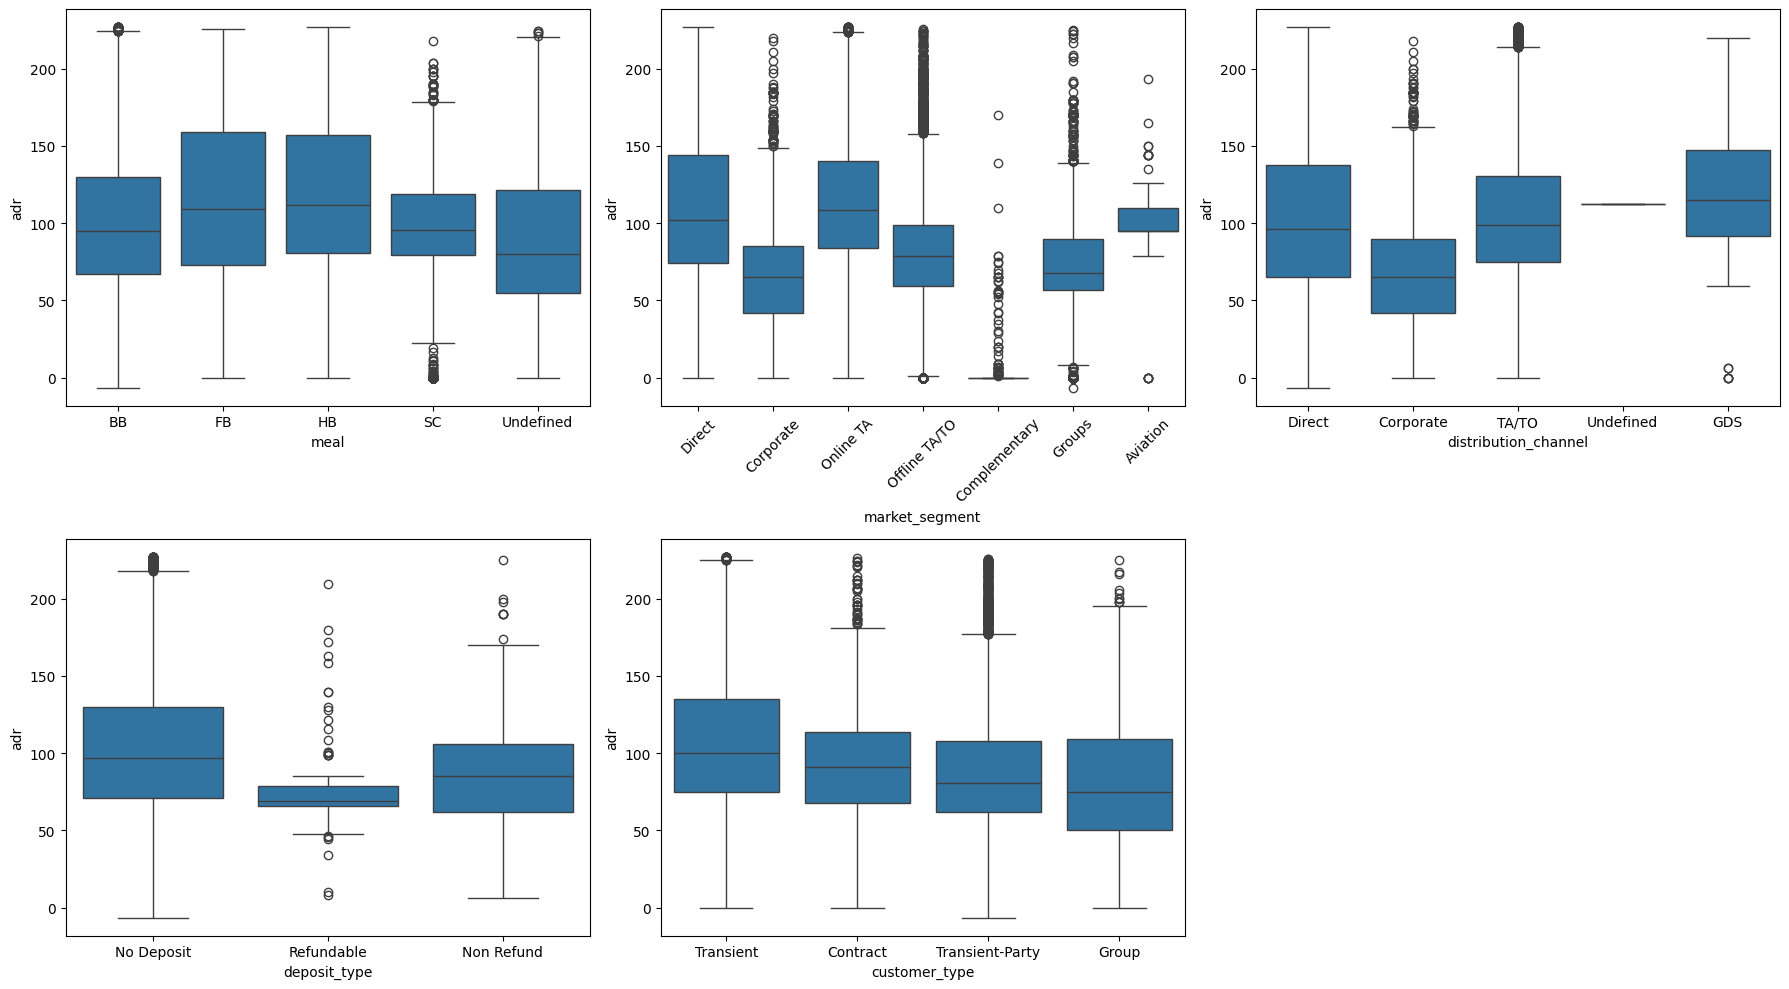

In [179]:
## Correlation of ADR with categorical columns

plt.figure(figsize=(18,10))

## 1. Meal vs ADR

plt.subplot(2,3,1)
sns.boxplot(x=df['meal'], y=df['adr'])

## 2. Market Segment vs ADR

plt.subplot(2,3,2)
sns.boxplot(x=df['market_segment'], y=df['adr'])
plt.xticks(rotation=45)

## 3. Distribution Channel vs ADR

plt.subplot(2,3,3)
sns.boxplot(x=df['distribution_channel'], y=df['adr'])

## 4. Deposit Type vs ADR

plt.subplot(2,3,4)
sns.boxplot(x=df['deposit_type'], y=df['adr'])

## 5. Customer Type vs ADR

plt.subplot(2,3,5)
sns.boxplot(x=df['customer_type'], y=df['adr'])

plt.tight_layout()
plt.show()

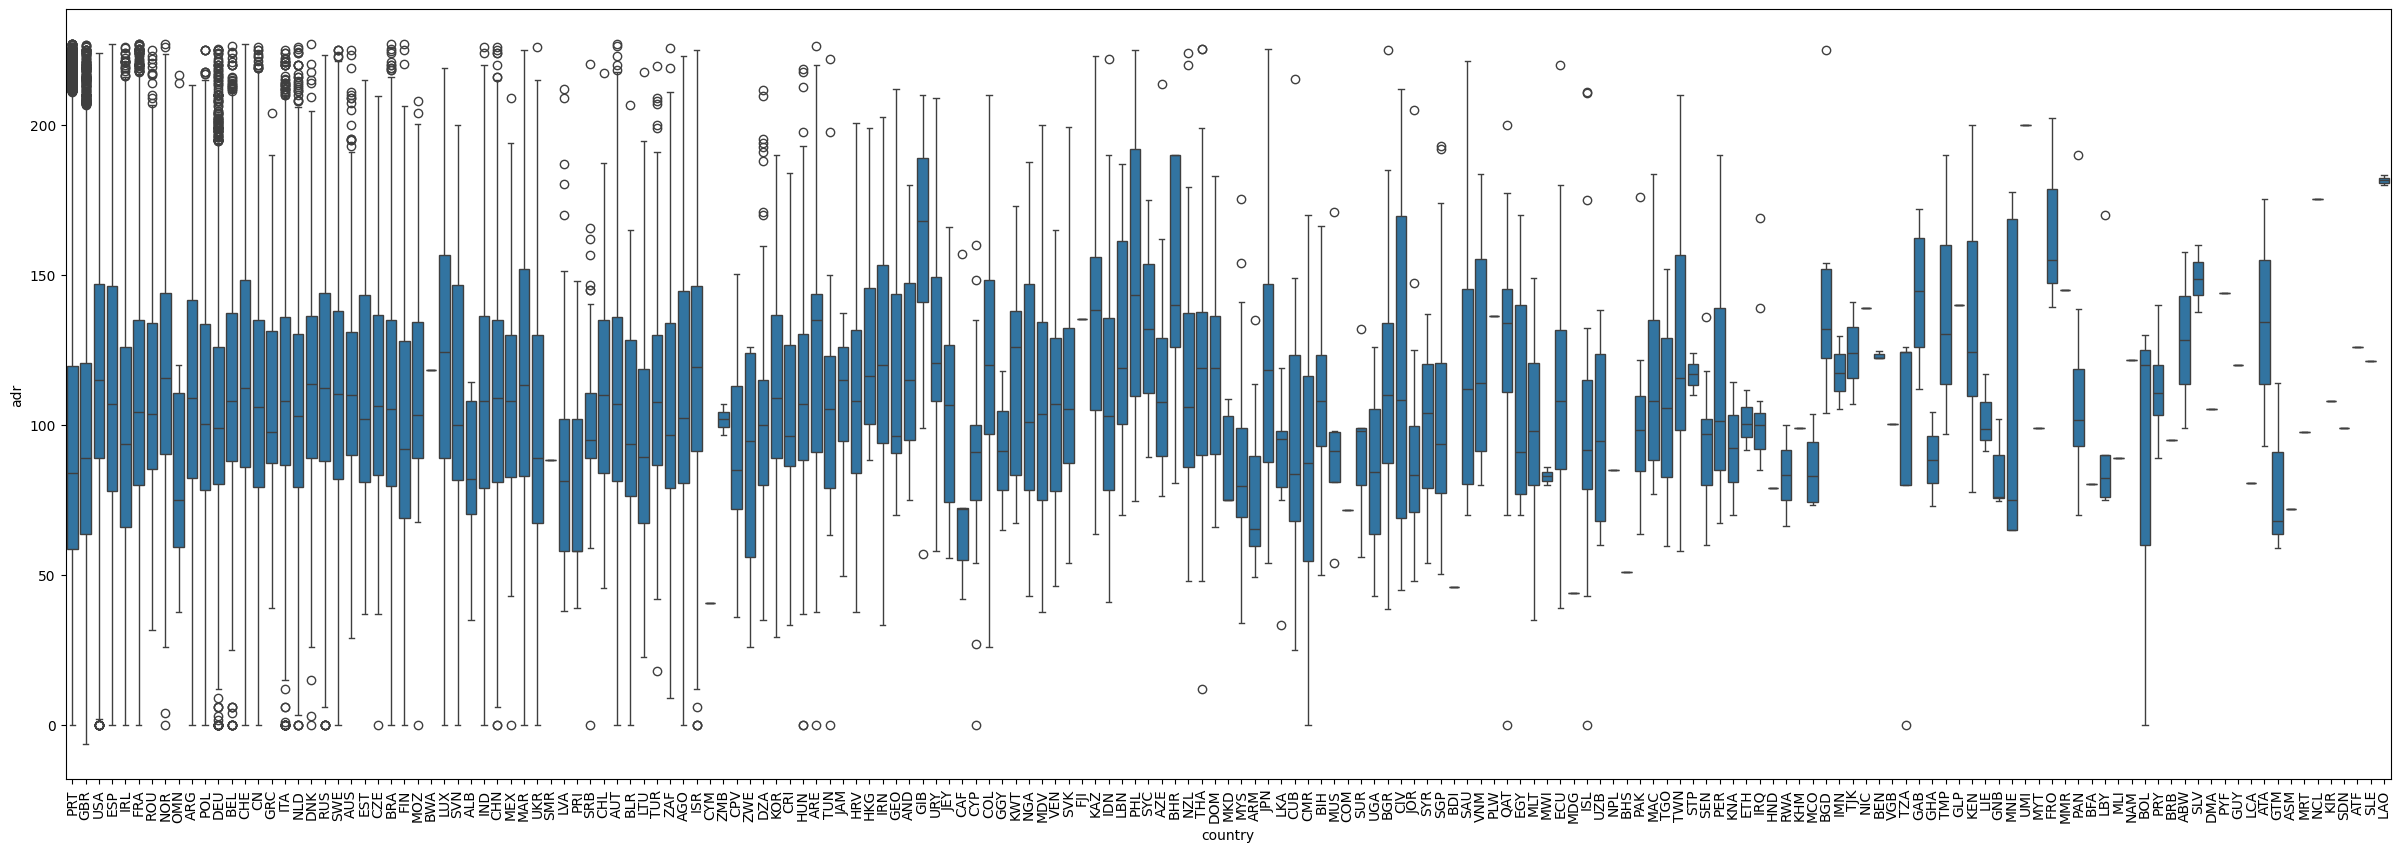

In [180]:
## Country vs ADR

plt.figure(figsize=(30,10))
sns.boxplot(x=df['country'], y=df['adr'])
plt.xticks(rotation=90)
plt.show()

2. Do guests who book earlier tend to request more changes?

In [183]:
## H0 : There is no correlation between lead_time and booking changes.

t_stat, p_value = pearsonr(df['lead_time'], df['booking_changes'])

if p_value < 0.05:
    print('Reject Null Hypothesis.')
else:
    print('Do not reject Null Hypothesis.')


Reject Null Hypothesis.


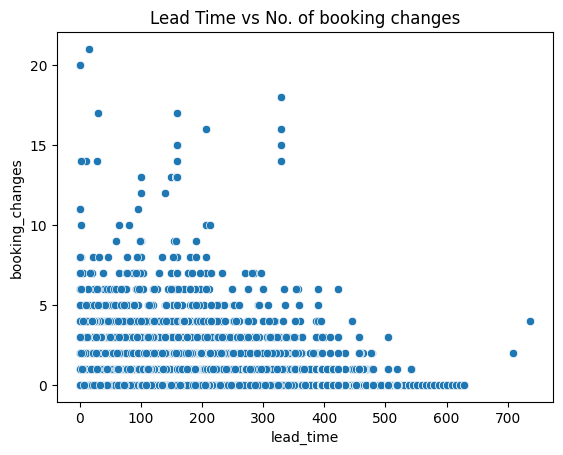

In [184]:
sns.scatterplot(x=df['lead_time'],y=df['booking_changes'])
plt.title('Lead Time vs No. of booking changes')
plt.show()

3. Are there pricing or booking differences across countries?

In [185]:
## Find top 5 countries with the highest booking counts.

top_countries = df['country'].value_counts().head(5).index
df_top = df[df['country'].isin(top_countries)]

In [186]:
## H0 : There is no pricing difference for different countries. 

## One Way ANOVA Test.

mod1 = ols('adr ~ country', data = df_top).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

               df        sum_sq       mean_sq           F  PR(>F)
country       4.0  4.494426e+06  1.123606e+06  544.563543     0.0
Residual  57590.0  1.188263e+08  2.063316e+03         NaN     NaN


In [187]:
print(pairwise_tukeyhsd(endog=df_top['adr'],groups=df_top['country']))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
   DEU    ESP    8.153   0.0   5.8859  10.4201   True
   DEU    FRA   4.7656   0.0   2.6081   6.9232   True
   DEU    GBR  -9.6334   0.0 -11.7253  -7.5415   True
   DEU    PRT -14.2948   0.0 -16.1538 -12.4357   True
   ESP    FRA  -3.3874   0.0  -5.3968  -1.3779   True
   ESP    GBR -17.7864   0.0 -19.7252 -15.8477   True
   ESP    PRT -22.4478   0.0 -24.1327 -20.7629   True
   FRA    GBR -14.3991   0.0 -16.2085 -12.5896   True
   FRA    PRT -19.0604   0.0 -20.5948  -17.526   True
   GBR    PRT  -4.6613   0.0  -6.1019  -3.2207   True
-----------------------------------------------------


In [188]:
## p-value < 0.05, we reject the Null Hypothesis.

In [189]:
## Booking count vs Country

top_ten_countries = df['country'].value_counts().head(10)
top_ten_countries

country
PRT    26577
GBR    10252
FRA     8642
ESP     6790
DEU     5334
ITA     2994
IRL     2981
BEL     2048
BRA     1956
NLD     1880
Name: count, dtype: int64

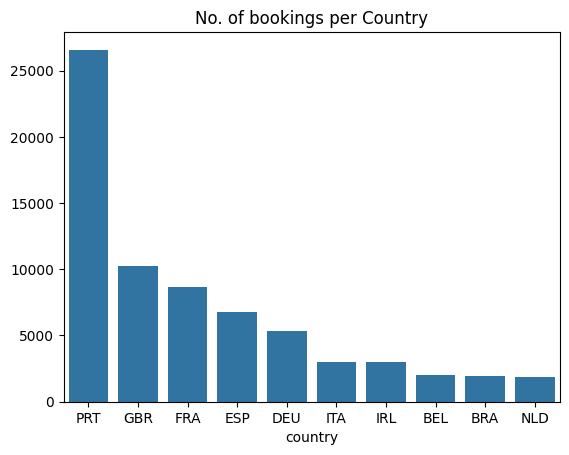

In [190]:
sns.barplot(x=top_ten_countries.index, y=top_ten_countries.values)
plt.title('No. of bookings per Country')
plt.show()

4. Is there a pattern in room upgrades or reassignments?

In [191]:
## H0 : Lead Time has no effect on room reassignment.

upgraded = df[df['room_mismatch'] == 1]['lead_time']
not_upgraded = df[df['room_mismatch'] == 0]['lead_time']

t_stat, p_val = ttest_ind(upgraded, not_upgraded, equal_var=False)

if p_value < 0.05:
    print('Reject Null Hypothesis.')
else:
    print('Do not reject Null Hypothesis.')

Reject Null Hypothesis.


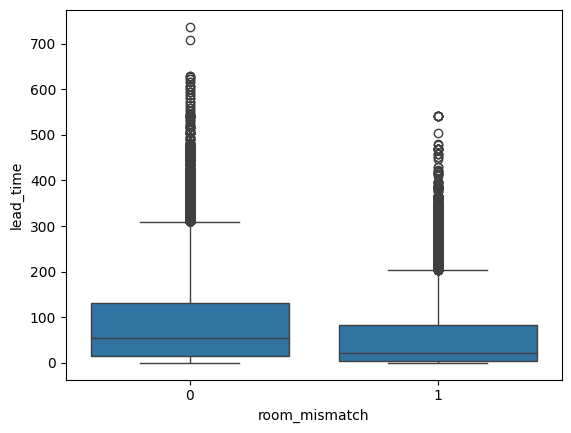

In [192]:
sns.boxplot(x='room_mismatch', y='lead_time', data=df)
plt.show()

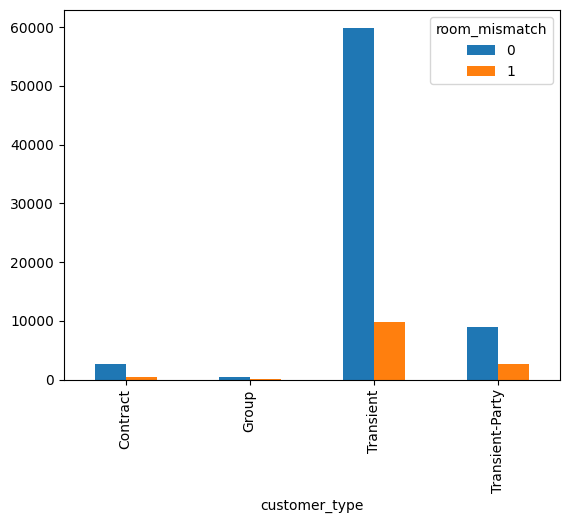

In [194]:
room_cust_ct = pd.crosstab(df['customer_type'], df['room_mismatch'])
room_cust_ct.plot(kind='bar')
plt.show()

In [195]:
## H0 : Customer Type does not affect room reassignment.


chi2, p_value, dof, ex = chi2_contingency(room_cust_ct)
if p_value < 0.05:
    print('Reject Null Hypothesis.')
else:
    print('Do not reject Null Hypothesis.')

Reject Null Hypothesis.


5. Are reserved room type consistenly matched with assigned room types?

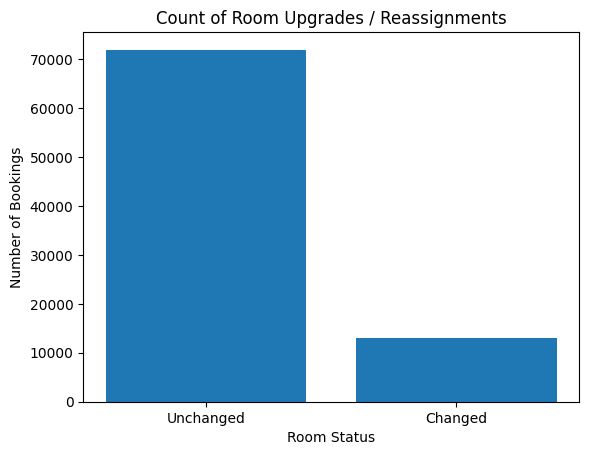

In [196]:
plt.bar(df['room_mismatch'].value_counts().index, df['room_mismatch'].value_counts())
plt.xticks([0,1], ['Unchanged', 'Changed'])
plt.xlabel('Room Status')
plt.ylabel('Number of Bookings')
plt.title('Count of Room Upgrades / Reassignments')
plt.show()

In [197]:
match_rate = df['room_mismatch'].value_counts(normalize=True) * 100
print('Percent of Bookings where Reserved Room and Assigned Room were the same: ',match_rate.iloc[0])
print('Percent of Bookings where Rooms were changed: ',match_rate.iloc[1])

Percent of Bookings where Reserved Room and Assigned Room were the same:  84.7199481712704
Percent of Bookings where Rooms were changed:  15.280051828729608


6. What are the most common guest demographics (e.g., group size, nationality)? 

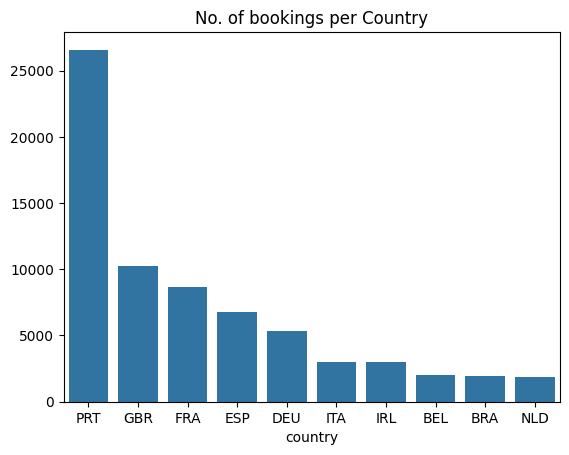

In [198]:
## Most common countries.

top_ten_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_ten_countries.index, y=top_ten_countries.values)
plt.title('No. of bookings per Country')
plt.show()

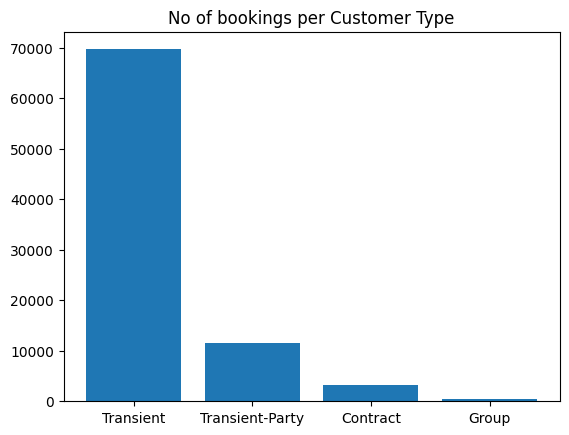

In [199]:
## Most Common Customer Type

plt.bar(df['customer_type'].value_counts().index,df['customer_type'].value_counts())
plt.title('No of bookings per Customer Type')
plt.show()

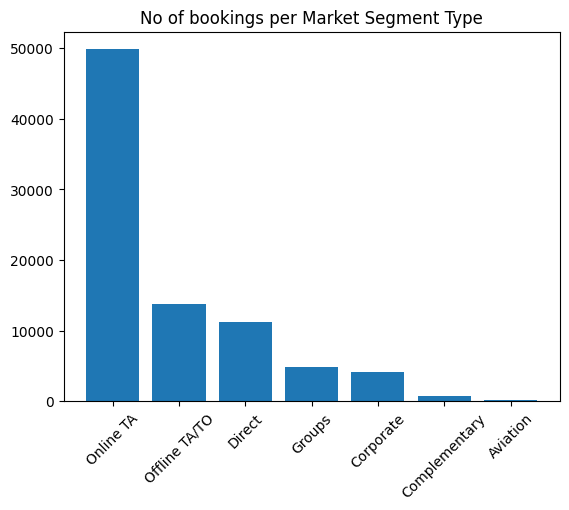

In [200]:
## Most Common Customer Type

plt.bar(df['market_segment'].value_counts().index,df['market_segment'].value_counts())
plt.title('No of bookings per Market Segment Type')
plt.xticks(rotation=45)
plt.show()

7. Are there patterns in guest types (e.g, transient vs corporate) thet influence booking behavior?

In [202]:
## Stay Duration per Customer Type

## H0: Average stay duration does not differ by customer type

mod1 = ols('total_nights ~ customer_type', data=df).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

                    df         sum_sq      mean_sq           F  PR(>F)
customer_type      3.0   19763.867515  6587.955838  886.810034     0.0
Residual       84891.0  630640.315016     7.428824         NaN     NaN


In [205]:
print(pairwise_tukeyhsd(endog=df['total_nights'],groups=df['customer_type']))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1       group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
 Contract           Group  -3.0938    0.0 -3.4216  -2.766   True
 Contract       Transient   -2.479    0.0 -2.6068 -2.3512   True
 Contract Transient-Party  -2.7001    0.0  -2.841 -2.5591   True
    Group       Transient   0.6148    0.0  0.3106   0.919   True
    Group Transient-Party   0.3937 0.0061  0.0838  0.7036   True
Transient Transient-Party  -0.2211    0.0 -0.2914 -0.1508   True
----------------------------------------------------------------


In [206]:
## H0: Lead time does not vary across Customer Type

mod1 = ols('lead_time ~ customer_type', data=df).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

                    df        sum_sq       mean_sq           F  PR(>F)
customer_type      3.0  1.922127e+07  6.407090e+06  883.855255     0.0
Residual       84891.0  6.153771e+08  7.249026e+03         NaN     NaN


In [207]:
print(pairwise_tukeyhsd(endog=df['lead_time'],groups=df['customer_type']))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1       group2     meandiff p-adj   lower    upper   reject
------------------------------------------------------------------
 Contract           Group -56.8173    0.0 -67.0568 -46.5777   True
 Contract       Transient -35.7929    0.0 -39.7853 -31.8006   True
 Contract Transient-Party   4.4575 0.0459   0.0546   8.8603   True
    Group       Transient  21.0243    0.0  11.5225  30.5261   True
    Group Transient-Party  61.2747    0.0  51.5932  70.9562   True
Transient Transient-Party  40.2504    0.0  38.0549  42.4459   True
------------------------------------------------------------------


In [208]:
## H0: ADR is same for all customer types

mod1 = ols('adr ~ customer_type', data=df).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

                    df        sum_sq       mean_sq           F  PR(>F)
customer_type      3.0  4.316327e+06  1.438776e+06  722.000539     0.0
Residual       84891.0  1.691676e+08  1.992762e+03         NaN     NaN


In [209]:
print(pairwise_tukeyhsd(endog=df['adr'],groups=df['customer_type']))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1       group2     meandiff p-adj   lower    upper   reject
------------------------------------------------------------------
 Contract           Group -11.7768    0.0 -17.1455  -6.4081   True
 Contract       Transient  12.4013    0.0  10.3081  14.4945   True
 Contract Transient-Party  -7.1719    0.0  -9.4804  -4.8635   True
    Group       Transient  24.1781    0.0  19.1962    29.16   True
    Group Transient-Party   4.6049 0.0912  -0.4712    9.681  False
Transient Transient-Party -19.5732    0.0 -20.7244 -18.4221   True
------------------------------------------------------------------


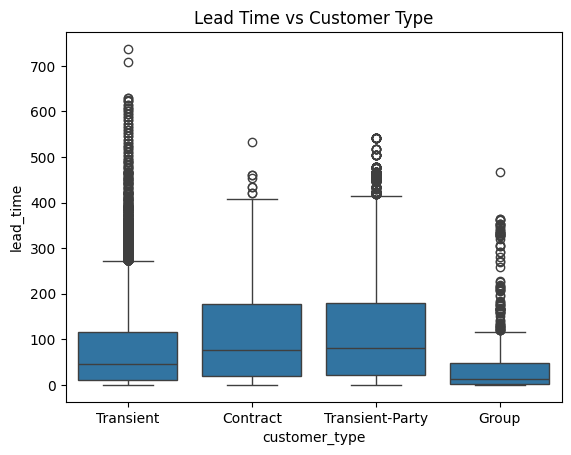

In [210]:
sns.boxplot(x='customer_type', y='lead_time', data=df)
plt.title('Lead Time vs Customer Type')
plt.show()

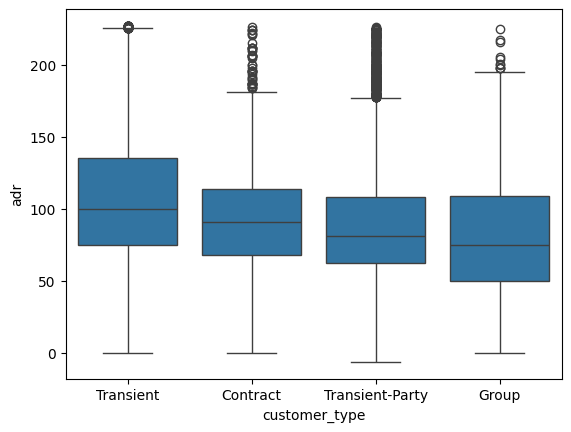

In [211]:
sns.boxplot(x='customer_type', y='adr', data=df)
plt.show()

8. How does booking lead time vary across customer types and countries?

In [212]:
## H0: Average Lead Time is same across all customer types.

mod1 = ols('lead_time ~ customer_type', data=df).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

                    df        sum_sq       mean_sq           F  PR(>F)
customer_type      3.0  1.922127e+07  6.407090e+06  883.855255     0.0
Residual       84891.0  6.153771e+08  7.249026e+03         NaN     NaN


In [213]:
print(pairwise_tukeyhsd(endog=df['lead_time'],groups=df['customer_type']))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1       group2     meandiff p-adj   lower    upper   reject
------------------------------------------------------------------
 Contract           Group -56.8173    0.0 -67.0568 -46.5777   True
 Contract       Transient -35.7929    0.0 -39.7853 -31.8006   True
 Contract Transient-Party   4.4575 0.0459   0.0546   8.8603   True
    Group       Transient  21.0243    0.0  11.5225  30.5261   True
    Group Transient-Party  61.2747    0.0  51.5932  70.9562   True
Transient Transient-Party  40.2504    0.0  38.0549  42.4459   True
------------------------------------------------------------------


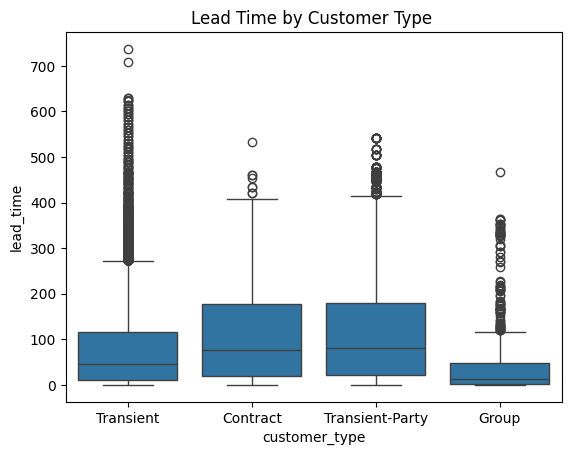

In [214]:
sns.boxplot(x=df['customer_type'],y=df['lead_time'])
plt.title('Lead Time by Customer Type ')
plt.show()

In [215]:
## H0: Average Lead Time is same across all countries.

mod1 = ols('lead_time ~ country', data=df).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

               df        sum_sq        mean_sq          F  PR(>F)
country     174.0  4.324537e+07  248536.595767  35.577203     0.0
Residual  84272.0  5.887106e+08    6985.838611        NaN     NaN


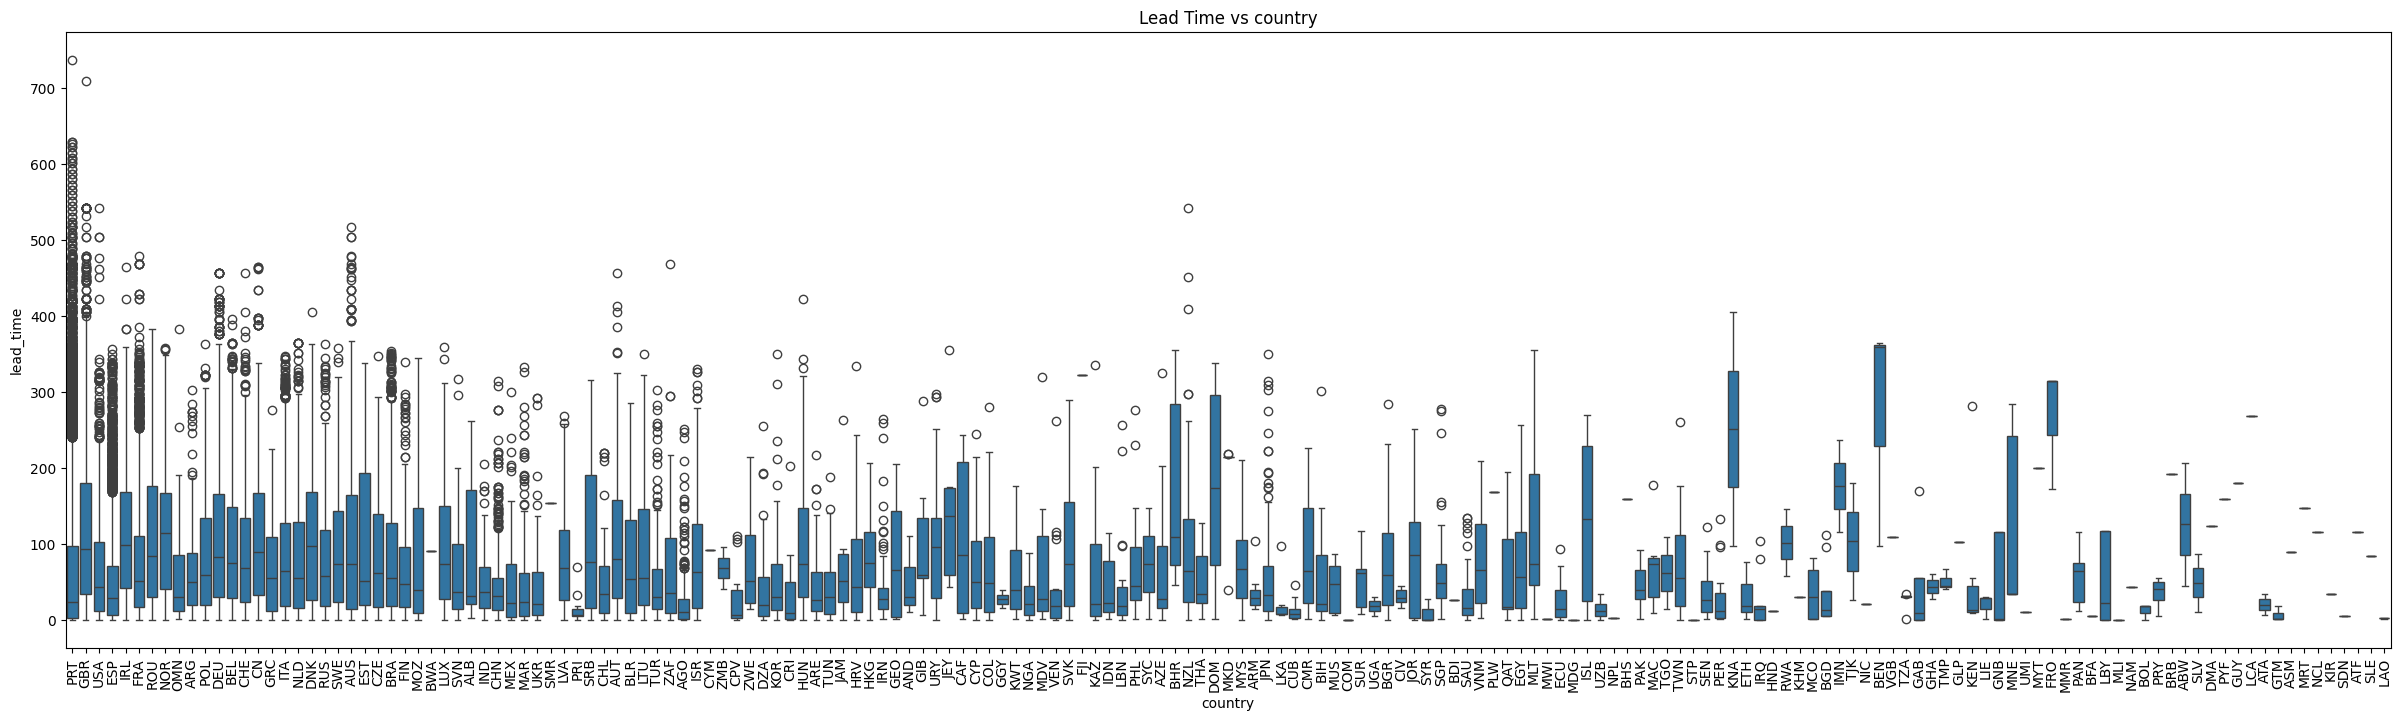

In [216]:
plt.figure(figsize=(30,8))
sns.boxplot(x='country', y='lead_time', data=df)
plt.title('Lead Time vs country')
plt.xticks(rotation=90)
plt.show()

9.	Are longer lead times associated with fewer booking changes or cancellations?

In [217]:
## H0: Lead time and booking changes are not correlated

pearson_corr, p_value = pearsonr(df['lead_time'], df['booking_changes'])
p_value  ## p_value < 0.05, reject Null Hypothesis.

np.float64(2.810124571424889e-113)

In [218]:
## H0: Lead time has no impact on cancellation 

cancelled = df[df['is_canceled'] == 1]['lead_time']
not_cancelled = df[df['is_canceled'] == 0]['lead_time']

t_stat, p_val = ttest_ind(cancelled, not_cancelled, equal_var=False)
p_value  ## p_value < 0.05, reject Null Hypothesis.

np.float64(2.810124571424889e-113)

In [219]:
10.	What is the typical duration of stay, and how does it vary by customer type or segment?

Object `segment` not found.


In [221]:
print("Mean stay duration:", df['total_nights'].mean())
print("Median stay duration:", df['total_nights'].median())

Mean stay duration: 3.614323576182343
Median stay duration: 3.0


In [223]:
## Stay Duration by Customer Type

df.groupby('customer_type')['total_nights'].agg(['mean', 'median', 'count'])

,mean,median,count
customer_type,,,
Contract,6.035703,5.0,3137
Group,2.941948,2.0,534
Transient,3.556734,3.0,69649
Transient-Party,3.335637,3.0,11575


In [225]:
## Stay Duration by Market Segment

df.groupby('market_segment')['total_nights'].agg(['mean', 'median', 'count'])

,mean,median,count
market_segment,,,
Aviation,3.572687,2.0,227
Complementary,1.669516,1.0,702
Corporate,2.045671,1.0,4204
Direct,3.162339,2.0,11168
Groups,3.458706,3.0,4916
Offline TA/TO,4.700752,4.0,13838
Online TA,3.589205,3.0,49840


11.	How often are guests upgraded or reassigned to a different room type?

In [253]:
room_change_counts = df['room_mismatch'].value_counts()
print(room_change_counts)


room_mismatch
0    71923
1    12972
Name: count, dtype: int64


In [254]:
room_change_pct = df['room_mismatch'].value_counts(normalize=True) * 100
print(room_change_pct)


room_mismatch
0    84.719948
1    15.280052
Name: proportion, dtype: float64


12.	Are guests who make special requests more likely to experience booking changes or longer stays?

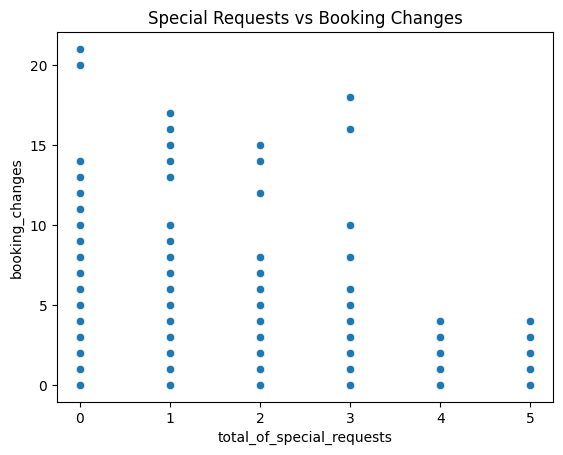

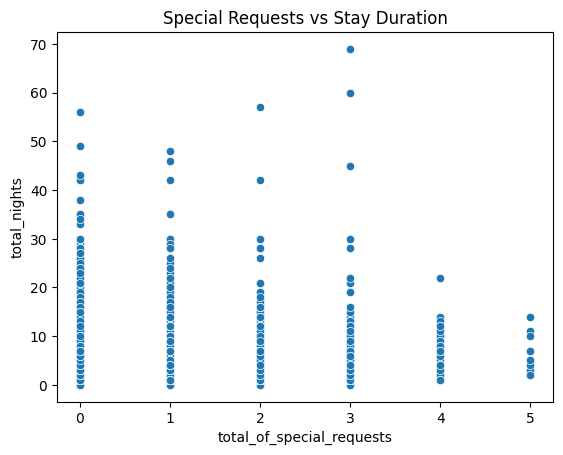

In [251]:
sns.scatterplot(data=df, x='total_of_special_requests', y='booking_changes')
plt.title("Special Requests vs Booking Changes")
plt.show()

sns.scatterplot(data=df, x='total_of_special_requests', y='total_nights')
plt.title("Special Requests vs Stay Duration")
plt.show()

guests who make special requests more likely to experience booking changes
guests who make special requests more likely to stay for avg no of days

13.	Do certain market segments or distribution channels show higher booking consistency or revenue?

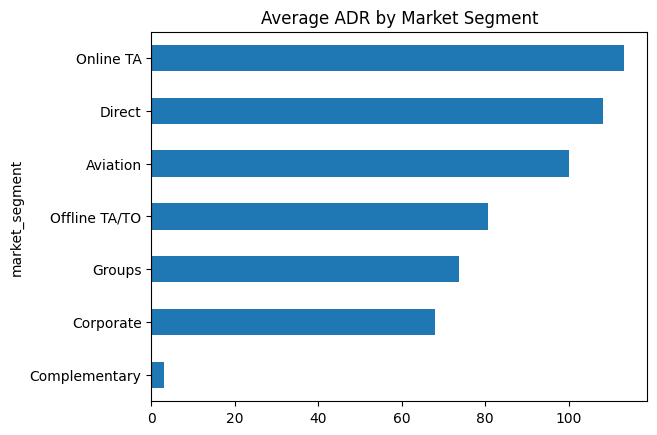

In [249]:
segment_adr = df.groupby('market_segment')['adr'].mean().sort_values()
segment_adr.plot(kind='barh')
plt.title("Average ADR by Market Segment")
plt.show()

higher booking consistency or revenue are showed by Online TA and Direct

14. What factors are most strongly associated with higher ADR?

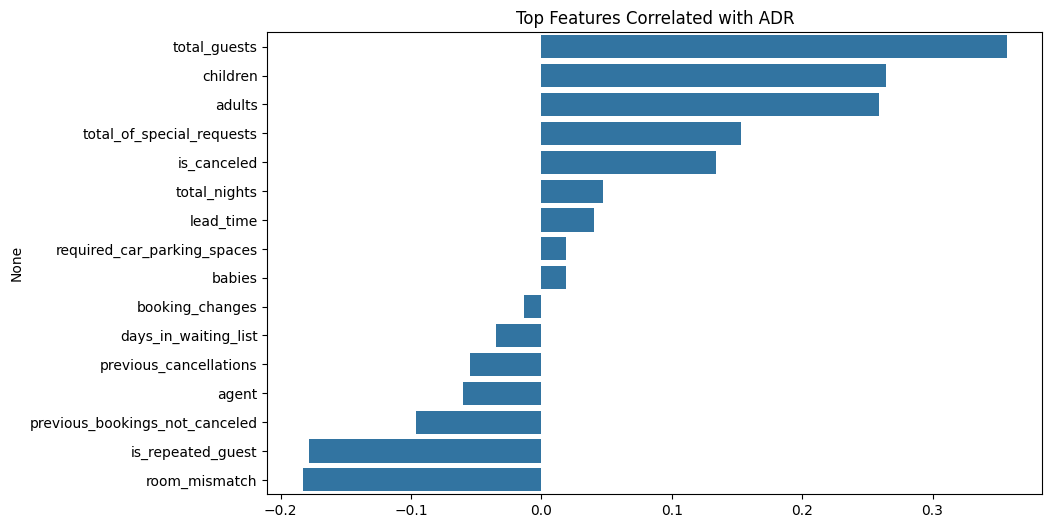

In [239]:
num_cols = df.select_dtypes(include='number')
corr = num_cols.corr()

# Sort top correlations with ADR
adr_corr = corr['adr'].drop('adr').sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=adr_corr.values, y=adr_corr.index)
plt.title("Top Features Correlated with ADR")
plt.show()

factors like revenue, total no of guest,group_size are the reasons for stronh ADR.

15. Are there customer types or segments consistently contributing to higher revenue?

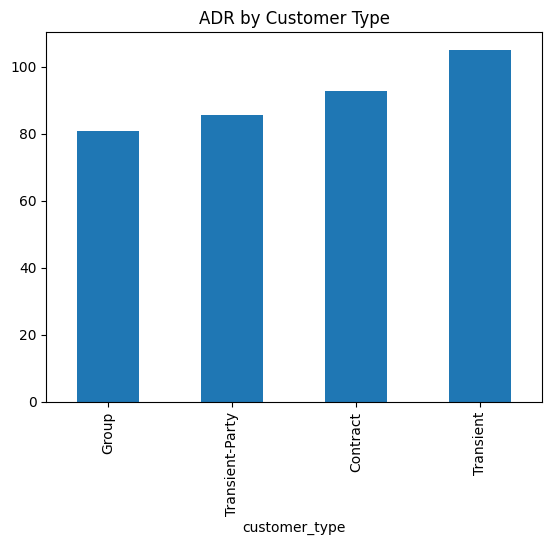

In [241]:
revenue_by_type = df.groupby('customer_type')['adr'].mean().sort_values()
revenue_by_type.plot(kind='bar')
plt.title("ADR by Customer Type")
plt.show()

Transient customers contribute to higher revenue

16. Do bookings with more lead time or from specific countries yield higher ADR?

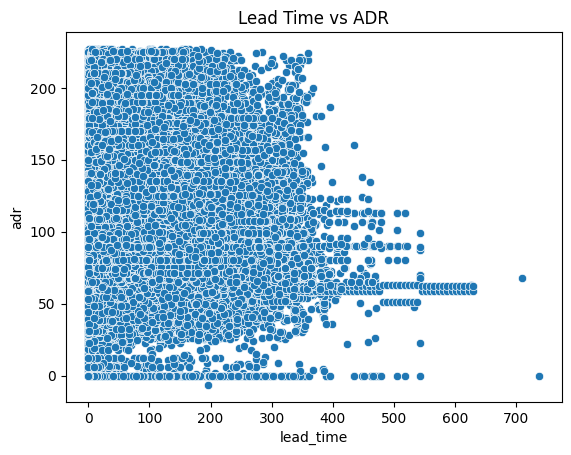

In [242]:
sns.scatterplot(data=df, x='lead_time', y='adr')
plt.title("Lead Time vs ADR")
plt.show()

booking with lower lead time generate adr with higher ADR as comapred to more lead time

17. Are guests with higher ADR more likely to request special services or make booking modifications?

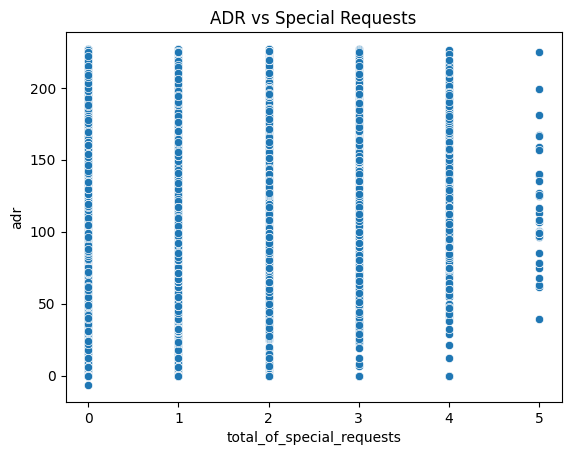

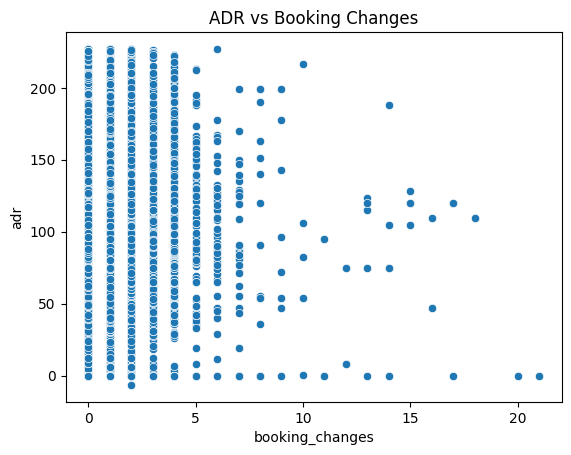

In [243]:
sns.scatterplot(data=df, x='total_of_special_requests', y='adr')
plt.title("ADR vs Special Requests")
plt.show()

sns.scatterplot(data=df, x='booking_changes', y='adr')
plt.title("ADR vs Booking Changes")
plt.show()

In general less number of special request result in higher ADR
In general less number of booking_changes result in higher ADR

18. Do guests from different countries behave differently in terms of booking timing or stay length?

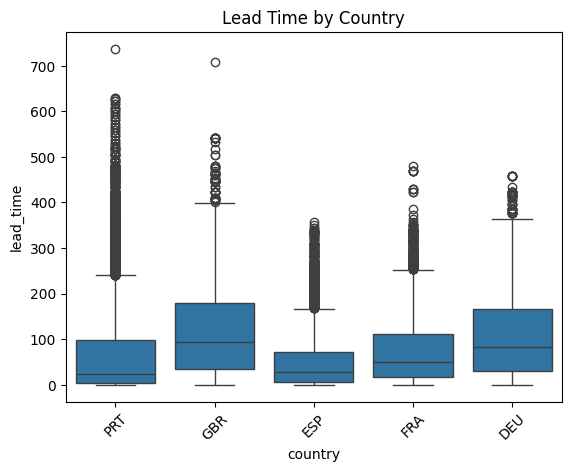

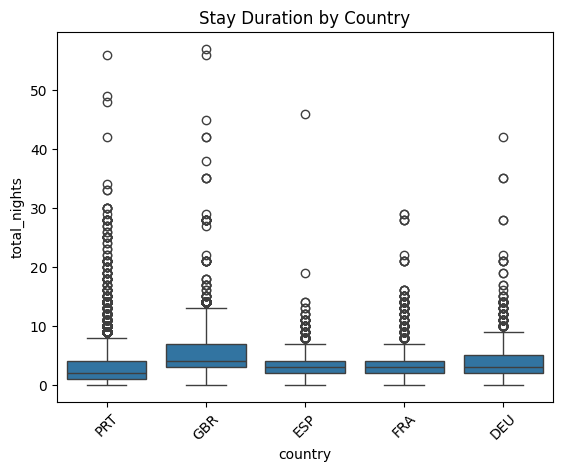

In [246]:
top_countries = df['country'].value_counts().head(5).index
subset = df[df['country'].isin(top_countries)]

sns.boxplot(data=subset, x='country', y='lead_time')
plt.title("Lead Time by Country")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=subset, x='country', y='total_nights')
plt.title("Stay Duration by Country")
plt.xticks(rotation=45)
plt.show()

19. Are guests who make booking changes more likely to request additional services or cancel?

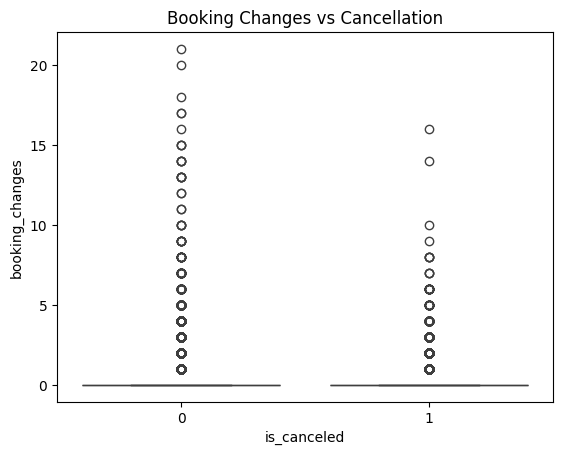

In [247]:
sns.boxplot(data=df, x='is_canceled', y='booking_changes')
plt.title("Booking Changes vs Cancellation")
plt.show()

More the changes less is the chance of it getting cancelled